<a href="https://colab.research.google.com/github/youssef-yo/EDA-project-in-R/blob/main/MLDM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project done by Giorgio Bonardi and Youssef El Fadi. 2022-2023

[Smoking and Drinking Dataset with body signal
](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset/data)

# Imports

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import random

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

In [ ]:
import tensorflow as tf

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from collections import Counter

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import GridSearchCV
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [ ]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import classification_report

Setting the random seed

In [ ]:
import random
random.seed(42)

# Import Dataset From GDrive

In [ ]:
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/Shareddrives/MLDM Project/smoking_driking_dataset_Ver01.csv")

# Dataset Description

In [ ]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
df['DRK_YN'].value_counts()['Y']

495488

In [ ]:
df['DRK_YN'].value_counts()['N']

495858

The dataset is balanced according to **DRK_YN** class.

# Data Preporcessing

## Attribute Transformation

Casting binary Object value into 1-0

From df.info() we saw that 'sex' and 'DRK_YN' are interpreted as Object so we are going to cast them to integer values having value 1 in the case of DRK_YN = 'Y' and for sex = 'Male', and to  value 0 for DRK_YN = 'N' and for 'sex' = 'Female'. This casting will ease our analysis and interaction with the data.

In [ ]:
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0})
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

## Count missing values

In [ ]:
number_NA = df.shape[0] - df.count()
number_NA

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

## Checking for duplicates

In [ ]:
df[df.duplicated()].shape

(26, 24)

We can see that we have 26 duplicate rows so we need to remove them, although removing 26 rows over 991346 will make no differance.



In [ ]:
df = df.drop_duplicates(keep='first')
df[df.duplicated].shape

(0, 24)

## Feature engineering phase

Let's see how is the distribution of the data for each attribute:

### Feature creation

BMI - Body mass index


BMI = weight / (height ^ 2)  [kg/m^2]


Note: We do the height/100 operation because the feature height is in **cm** and we want it in **m** for the BMI.

In [ ]:
df["BMI"] = df["weight"] / (df["height"]/100)**2

We can also discretize the BMI to have a categorical value

In [ ]:
df["BMI_cat"] = np.where(df.BMI < 18.5, "Underweight", "Normal Weight")
df["BMI_cat"] = np.where((df.BMI >= 18.5) & (df.BMI < 25), "Healthy Weight", df["BMI_cat"])
df["BMI_cat"] = np.where((df.BMI >= 25) & (df.BMI < 30), "Overweight", df["BMI_cat"])
df["BMI_cat"] = np.where((df.BMI >= 30), "Obese", df["BMI_cat"])

In [ ]:
display(df.quantile([0, 0.05, 0.50, 0.80, 0.95, 0.99, 1]).T)

<ipython-input-26-d7a1375546eb>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.quantile([0, 0.05, 0.50, 0.80, 0.95, 0.99, 1]).T)


,0.00,0.05,0.50,0.80,0.95,0.99,1.00
sex,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
age,20.000000,25.000000,45.000000,60.000000,70.000000,80.000000,85.000000
height,130.000000,145.000000,160.000000,170.000000,175.000000,180.000000,190.000000
weight,25.000000,45.000000,60.000000,75.000000,85.000000,95.000000,140.000000
waistline,8.000000,66.000000,81.000000,89.000000,97.000000,105.000000,999.000000
sight_left,0.100000,0.400000,1.000000,1.200000,1.500000,2.000000,9.900000
sight_right,0.100000,0.400000,1.000000,1.200000,1.500000,2.000000,9.900000
hear_left,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
hear_right,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
SBP,67.000000,100.000000,120.000000,134.000000,148.000000,161.000000,273.000000


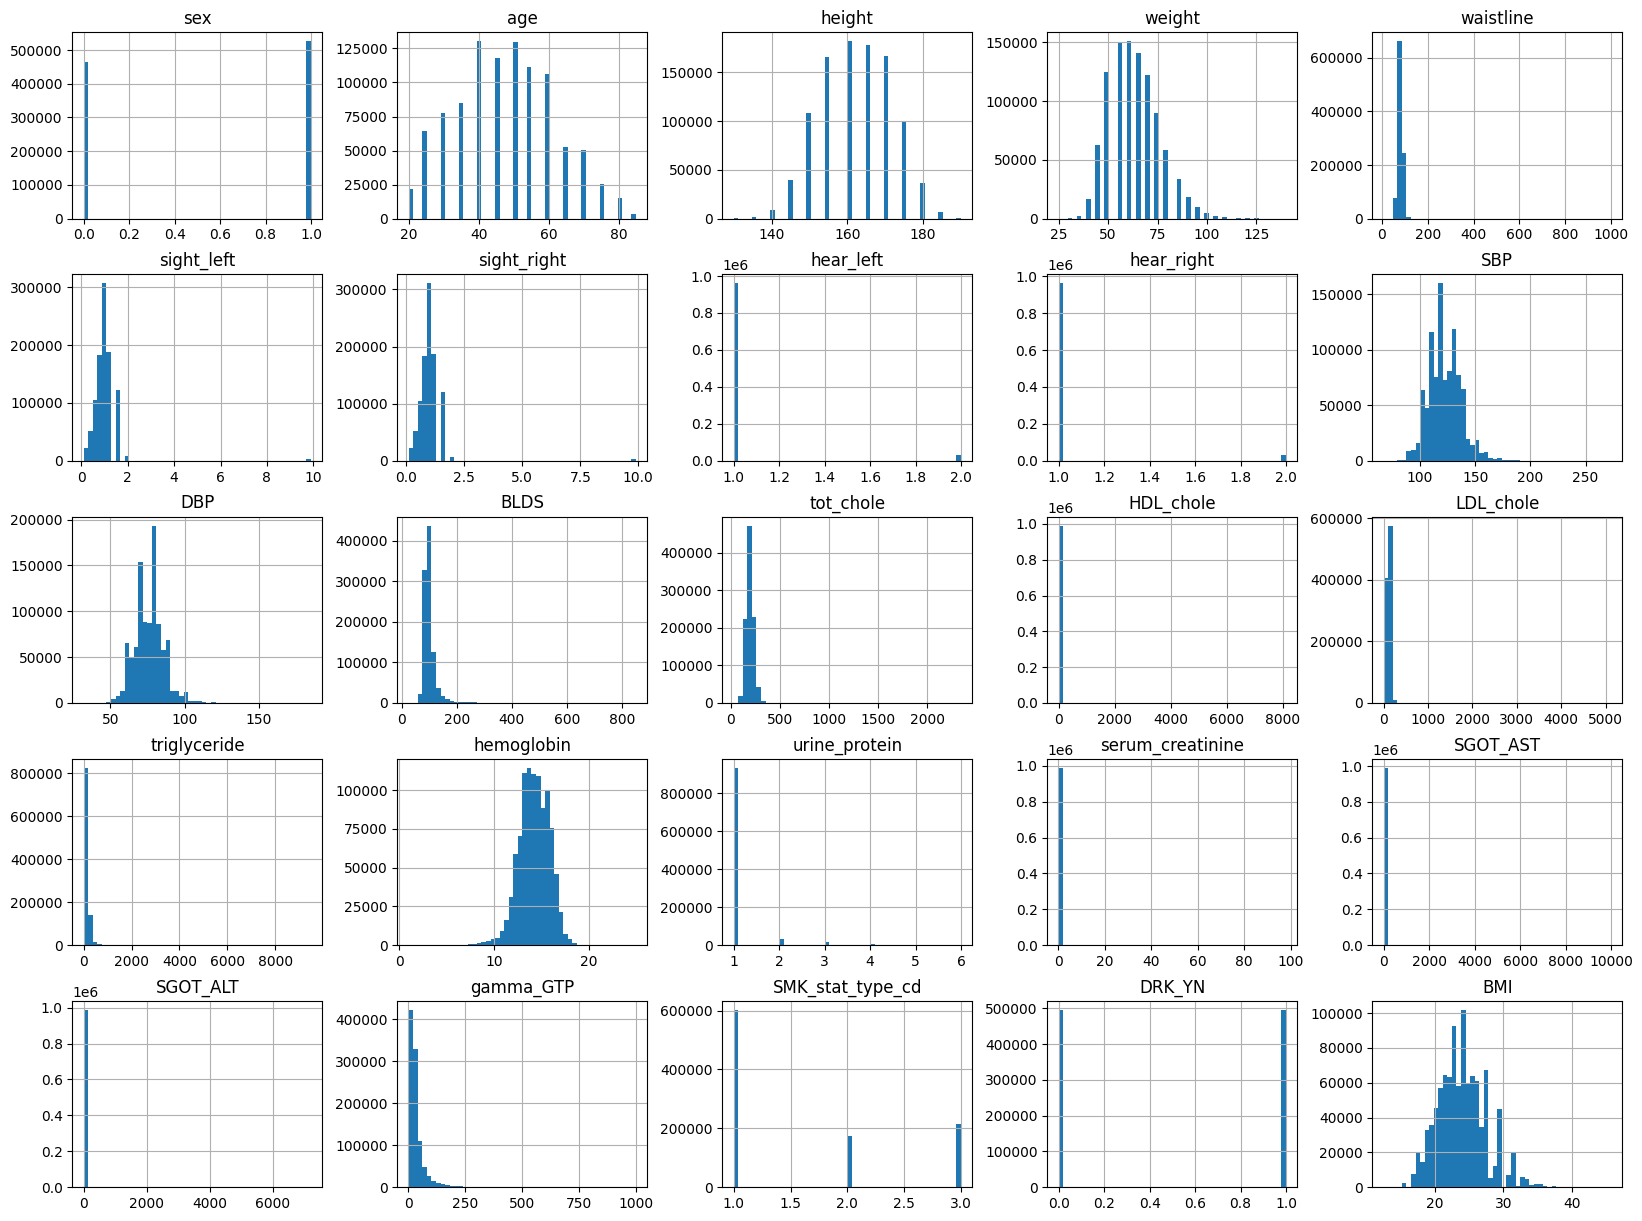

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df.describe()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,BMI
count,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,...,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000
mean,0.531008,47.614529,162.240563,63.283884,81.233255,0.980833,0.978428,1.031495,1.030476,122.432360,...,132.140030,14.229810,1.094221,0.860467,25.989424,25.755148,37.136152,1.608112,0.499814,23.917088
std,0.499038,14.181346,9.282922,12.514101,11.850296,0.605954,0.604779,0.174652,0.171892,14.543083,...,102.194762,1.584924,0.437719,0.480536,23.493668,26.308910,50.423811,0.818504,0.500000,3.514999
min,0.000000,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,...,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,12.486993
25%,0.000000,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,...,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000,21.484375
50%,1.000000,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000,23.875115
75%,1.000000,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,...,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000,25.951557
max,1.000000,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,...,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000,1.000000,45.714286


### Manage outliers

From the description and the printing of the function quantile we can see that there are outliers for the following features:

*   **waistline**
*   **BLDS**
*   **SBP** e **DBP**
*   **tot_chole**, **HDL_chole** e **LDL_chole**
*   **triglyceride**
*   **serum_creatinine**
*   **SGOT_AST** e **SGOT_ALT**
*   **gamma_GTP**








In [ ]:
def remove_outliers(df, columns, k=1.5):
    """
A function to remove outliers from the specified dataframe columns.

    Parameters:
    df (pandas.DataFrame): the original dataframe
    columns (list): list of columns to remove outliers for
    k (float): coefficient for calculating range boundaries
    """
    for column in columns:
        # Calculate the first and third quartiles
        q1 = df[column].quantile(0.25) # We find the 25 smallest values
        q3 = df[column].quantile(0.75) # We find the 25 largest values

        # Calculate the interquartile range (the difference between the largest and smallest values)
        iqr = q3 - q1

        #Replace values outside the range [q1 * qr, q3 + k * ir] with boundary values
        #clip -used to crop values
        #lower: minimum value for cropping. If the value of the element is less than lower, it is replaced by lower.
        #upper: maximum value for cropping. If the value of the element is greater than upper, it is replaced by upper.
        df[column] = df[column].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)

In [ ]:
remove_outliers(df,['waistline','SBP', 'DBP','BLDS','tot_chole','LDL_chole', 'HDL_chole', 'triglyceride','serum_creatinine','SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'hear_right', 'hear_left', 'urine_protein', 'sight_right', 'sight_left'],k=1.5)

In [ ]:
display(df.quantile([0, 0.05, 0.50, 0.80, 0.95, 0.99, 1]).T)

<ipython-input-31-d7a1375546eb>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.quantile([0, 0.05, 0.50, 0.80, 0.95, 0.99, 1]).T)


,0.00,0.05,0.50,0.80,0.95,0.99,1.00
sex,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
age,20.000000,25.000000,45.000000,60.000000,70.000000,80.000000,85.000000
height,130.000000,145.000000,160.000000,170.000000,175.000000,180.000000,190.000000
weight,25.000000,45.000000,60.000000,75.000000,85.000000,95.000000,140.000000
waistline,53.550000,66.000000,81.000000,89.000000,97.000000,105.000000,108.350000
sight_left,0.100000,0.400000,1.000000,1.200000,1.500000,1.950000,1.950000
sight_right,0.100000,0.400000,1.000000,1.200000,1.500000,1.950000,1.950000
hear_left,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
hear_right,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SBP,83.500000,100.000000,120.000000,134.000000,148.000000,159.500000,159.500000


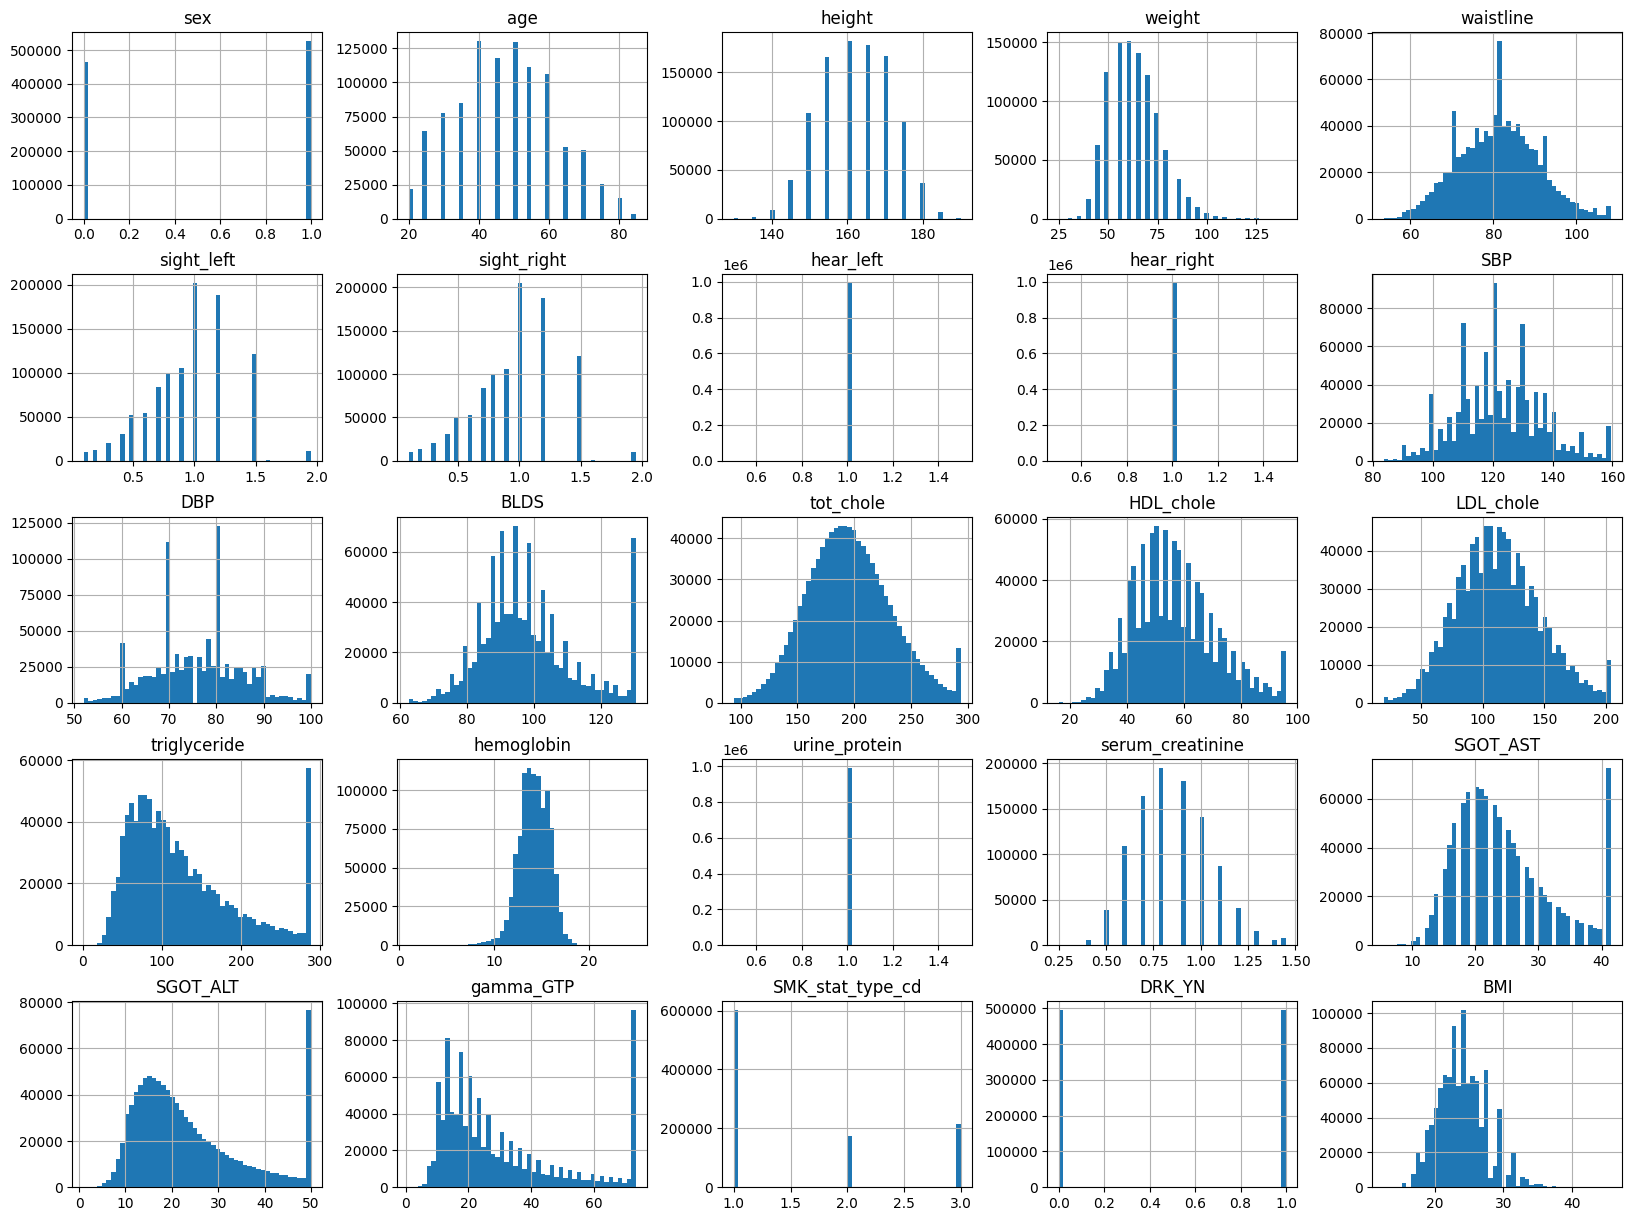

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### Remove of features
We can clearly see that the attributes *hear_left*, *hear_right* and *urine_protein* doesn't vary so they will not be significant for the classification of our target, we are going to remove them.

In [ ]:
df = df.drop(['hear_right', 'hear_left', 'urine_protein', 'sight_right', 'sight_left'], axis=1)

## Correlation

preso da: https://www.kaggle.com/code/yeonseokcho/smoking-drinking-vs-body-signal#3.-Modeling-for-Drinkig

In [ ]:
import seaborn as sns

In [ ]:
correlation = df.corr()
correlation

<ipython-input-35-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,sex,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,BMI
sex,1.000000,-0.083225,0.722774,0.581707,0.433004,0.180829,0.201695,0.149583,-0.022999,-0.300588,-0.004412,0.255529,0.669416,0.585365,0.216299,0.342622,0.426686,0.590998,0.368721,0.216472
age,-0.083225,1.000000,-0.398501,-0.195333,0.165781,0.267936,0.112604,0.259017,0.011157,-0.121318,0.030361,0.086104,-0.173090,0.031720,0.166587,0.009334,0.019202,-0.126028,-0.284586,0.056637
height,0.722774,-0.398501,1.000000,0.668823,0.327559,0.038118,0.109488,0.025247,-0.023182,-0.174814,-0.014884,0.151567,0.531904,0.416747,0.078911,0.232869,0.279964,0.467306,0.374560,0.113213
weight,0.581707,-0.195333,0.668823,1.000000,0.786611,0.255694,0.279114,0.183549,0.064516,-0.336640,0.071374,0.340478,0.499496,0.374805,0.225081,0.436599,0.410876,0.366488,0.264282,0.809264
waistline,0.433004,0.165781,0.327559,0.786611,1.000000,0.347733,0.305578,0.282887,0.074346,-0.375069,0.081350,0.384276,0.368156,0.294215,0.277850,0.431994,0.413483,0.258166,0.120375,0.799847
SBP,0.180829,0.267936,0.038118,0.255694,0.347733,1.000000,0.739197,0.239425,0.068863,-0.134315,0.034603,0.230708,0.170242,0.128048,0.190651,0.205081,0.245716,0.087207,0.034365,0.313791
DBP,0.201695,0.112604,0.109488,0.279114,0.305578,0.739197,1.000000,0.181945,0.113437,-0.112635,0.069947,0.238132,0.243580,0.130695,0.177778,0.219106,0.268800,0.127604,0.100947,0.287565
BLDS,0.149583,0.259017,0.025247,0.183549,0.282887,0.239425,0.181945,1.000000,0.018052,-0.153879,-0.021587,0.246941,0.117444,0.121530,0.153198,0.216704,0.262704,0.099357,0.026951,0.229446
tot_chole,-0.022999,0.011157,-0.023182,0.064516,0.074346,0.068863,0.113437,0.018052,1.000000,0.173698,0.892338,0.274982,0.123762,0.013522,0.090512,0.117566,0.148687,0.011357,0.020222,0.099778
HDL_chole,-0.300588,-0.121318,-0.174814,-0.336640,-0.375069,-0.134315,-0.112635,-0.153879,0.173698,1.000000,-0.047732,-0.440149,-0.213449,-0.218186,-0.097493,-0.232983,-0.167371,-0.189870,0.048771,-0.313413


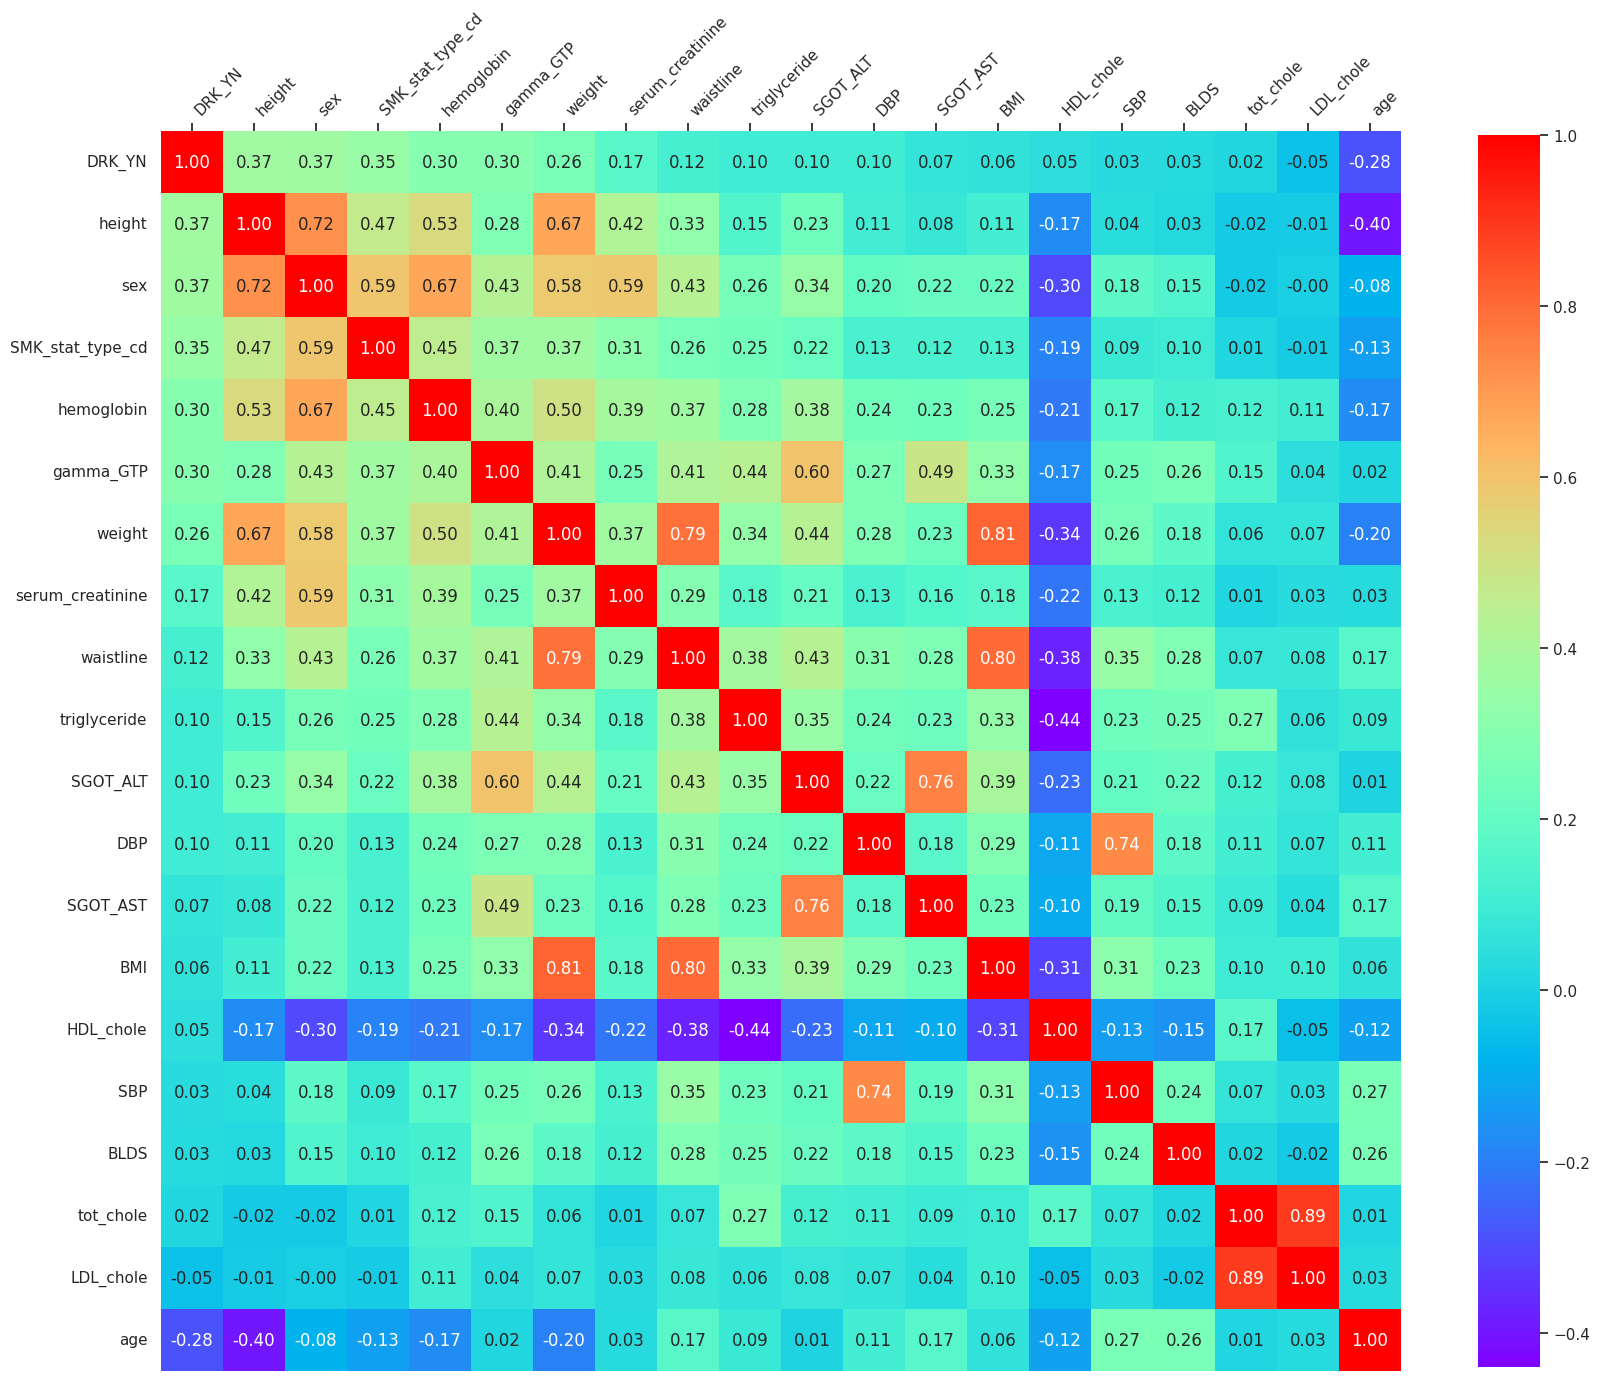

In [ ]:
# correlation with Drinking

plt.figure(figsize=(20, 20))
k=24
cols = correlation.nlargest(k, 'DRK_YN')['DRK_YN'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},
                 yticklabels=cols.values, xticklabels=cols.values, cmap="rainbow", cbar_kws={"shrink": 0.8})
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

# Drinking_No_Yes : Not Drinker 1, Drinker 2
# sex_n : Female 1, Male 2

We can see that apart some features, the overall dataset is low correlated.

## Divide features by semantic type (binary, nominal, numerical)






In [ ]:
cols_unique_vals_count = df.nunique().sort_values()
cols_unique_vals_count

sex                   2
DRK_YN                2
SMK_stat_type_cd      3
BMI_cat               4
height               13
age                  14
serum_creatinine     14
weight               24
SGOT_AST             38
DBP                  49
SGOT_ALT             50
BLDS                 70
gamma_GTP            74
SBP                  78
HDL_chole            81
BMI                 179
LDL_chole           185
hemoglobin          190
tot_chole           201
triglyceride        288
waistline           547
dtype: int64

In [ ]:
BINARY_COLS = [col for col, val in cols_unique_vals_count.items() if val == 2]
BINARY_COLS

['sex', 'DRK_YN']

In [ ]:
NOMINAL_NUNIQUE_THRESHOLD = 10
NOMINAL_COLS = [
    col
    for col, val in cols_unique_vals_count.items()
    if val > 2 and val < NOMINAL_NUNIQUE_THRESHOLD
]
NOMINAL_COLS

['SMK_stat_type_cd', 'BMI_cat']

In [ ]:
NUMERICAL_COLS = [
    col
    for col, val in cols_unique_vals_count.items()
    if val > NOMINAL_NUNIQUE_THRESHOLD
]
NUMERICAL_COLS

['height',
 'age',
 'serum_creatinine',
 'weight',
 'SGOT_AST',
 'DBP',
 'SGOT_ALT',
 'BLDS',
 'gamma_GTP',
 'SBP',
 'HDL_chole',
 'BMI',
 'LDL_chole',
 'hemoglobin',
 'tot_chole',
 'triglyceride',
 'waistline']

In [ ]:
CATEGORICAL_COLS = BINARY_COLS + NOMINAL_COLS
CATEGORICAL_COLS

['sex', 'DRK_YN', 'SMK_stat_type_cd', 'BMI_cat']

## Cast qualitative features to quantitative features

In [ ]:
dummies = pd.get_dummies(df.BMI_cat)
df = pd.concat([df, dummies], axis='columns')
df = df.drop(['BMI_cat'], axis='columns')

# Data split

In [ ]:
df_drinking = df.drop("SMK_stat_type_cd", axis=1)
y_drinking = df_drinking["DRK_YN"]
X_drinking = df_drinking.drop("DRK_YN", axis=1)

In [ ]:
train_ratio = 0.60
test_ratio = 0.20
validation_ratio = 0.20

X_train, X_test_drinking, y_train, y_test_drinking = train_test_split(X_drinking, y_drinking, test_size=test_ratio, random_state=42)
X_train_drinking, X_valid_drinking, y_train_drinking, y_valid_drinking = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio), random_state=42)

In [ ]:
counts = Counter(y_test_drinking)

print("Y Test")
for value, count in counts.items():
    print(f"{value}: {count}")

Y Test
1: 98752
0: 99512


In [ ]:
counts = Counter(y_train_drinking)

print("Y Train")
for value, count in counts.items():
    print(f"{value}: {count}")

Y Train
0: 297100
1: 297692


In [ ]:
counts = Counter(y_valid_drinking)

print("Y Validation")
for value, count in counts.items():
    print(f"{value}: {count}")

Y Validation
0: 99232
1: 99032


# Classifier

## Decision Tree Classifier

#### Default values

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_drinking, y_train_drinking)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt.predict(X_valid_drinking)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_valid_drinking, y_pred))

Accuracy: 0.6376649316063431


#### MAX depth

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

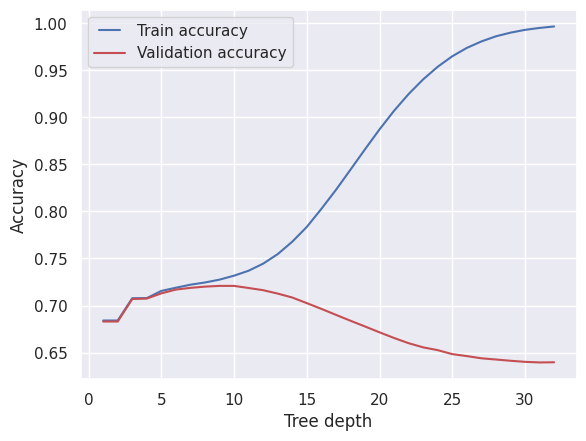

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
val_results = []
for max_depth in max_depths:
  dt = DecisionTreeClassifier(max_depth=int(max_depth), random_state=42)
  dt.fit(X_train_drinking, y_train_drinking)

  # training
  y_train_pred = dt.predict(X_train_drinking)
  accuracy_training = metrics.accuracy_score(y_train_drinking, y_train_pred)
  train_results.append(accuracy_training)

  # validation
  y_val_pred = dt.predict(X_valid_drinking)
  accuracy_val = metrics.accuracy_score(y_valid_drinking, y_val_pred)
  val_results.append(accuracy_val)

line1, = plt.plot(max_depths, train_results, 'b', label="Train accuracy")
line2, = plt.plot(max_depths, val_results, 'r', label="Validation accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

We can clearly see that for values grater than 10 the model start to overfit.
But we also can see that we get a better accuracy setting max_depth instead of using only the default value None.

### MIN samples splits

The minimum number of samples required to split an internal node

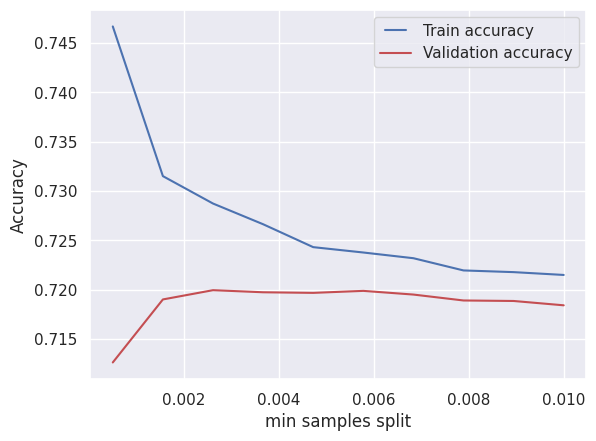

In [ ]:
min_samples_splits = np.linspace(0.0005, 0.01, 10, endpoint=True)
train_results = []
val_results = []
for min_samples_split in min_samples_splits:
  dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
  dt.fit(X_train_drinking, y_train_drinking)

  # training
  y_train_pred = dt.predict(X_train_drinking)
  accuracy_training = metrics.accuracy_score(y_train_drinking, y_train_pred)
  train_results.append(accuracy_training)

  # validation
  y_val_pred = dt.predict(X_valid_drinking)
  accuracy_val = metrics.accuracy_score(y_valid_drinking, y_val_pred)
  val_results.append(accuracy_val)

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train accuracy")
line2, = plt.plot(min_samples_splits, val_results, 'r', label="Validation accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples split')
plt.show()

The decision tree with values of min_samples_split between 0.002 and 0.006 stabilize without overfitting and giving us an accuracy~**72%**.

### Decision Tree with parameters setted

Lets put all the parameters togheter with the optimal value that we found for each parameter.

In [ ]:
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_split=0.001, random_state=42)
tree_clf.fit(X_train_drinking, y_train_drinking)

DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       min_samples_split=0.001, random_state=42)

In [ ]:
y_pred = tree_clf.predict(X_valid_drinking)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_valid_drinking, y_pred))

Accuracy: 0.7201458661179034
















































### GridSearch

For chossing the best value for the criterion and splitter feature we will use a **Grid Search**. The values for the other features will be choosed among the best that we have found so far.

In [ ]:
params = {'min_samples_split':[0.002, 0.003], 'max_depth': [5, 8, 10], 'max_features': [None, 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}
grid_search_cv_decisionTree = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring='accuracy', verbose=3, cv=3)

grid_search_cv_decisionTree.fit(X_train_drinking, y_train_drinking)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END criterion=gini, max_depth=5, max_features=None, min_samples_split=0.002, splitter=best;, score=0.716 total time=   3.1s
[CV 2/3] END criterion=gini, max_depth=5, max_features=None, min_samples_split=0.002, splitter=best;, score=0.714 total time=   2.7s
[CV 3/3] END criterion=gini, max_depth=5, max_features=None, min_samples_split=0.002, splitter=best;, score=0.714 total time=   2.1s
[CV 1/3] END criterion=gini, max_depth=5, max_features=None, min_samples_split=0.002, splitter=random;, score=0.702 total time=   0.7s
[CV 2/3] END criterion=gini, max_depth=5, max_features=None, min_samples_split=0.002, splitter=random;, score=0.701 total time=   0.7s
[CV 3/3] END criterion=gini, max_depth=5, max_features=None, min_samples_split=0.002, splitter=random;, score=0.701 total time=   0.7s
[CV 1/3] END criterion=gini, max_depth=5, max_features=None, min_samples_split=0.003, splitter=best;, score=0.716 total time=   2.0s
[

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [0.002, 0.003],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search_cv_decisionTree.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=0.003, random_state=42)

In [ ]:
grid_search_cv_decisionTree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_split': 0.003,
 'splitter': 'best'}

In [ ]:
y_val_pred = grid_search_cv_decisionTree.predict(X_valid_drinking)
accuracy_score(y_valid_drinking, y_val_pred)

0.7209074768994875

In [ ]:
grid_search_cv_decisionTree.best_score_

0.7220709088219075

### Testing Decision Tree with best parameters

Now lets test the best combination of the parameters on the Test set.

In [ ]:
best_decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, max_features=None, min_samples_split=0.003, random_state=42)

best_decision_tree.fit(X_train_drinking, y_train_drinking)

DecisionTreeClassifier(max_depth=10, min_samples_split=0.003, random_state=42)

In [ ]:
y_test_pred = best_decision_tree.predict(X_test_drinking)
accuracy_score(y_test_drinking, y_test_pred)

0.7233890166646492

### Feature Importance

In [ ]:
for name, score in zip(X_train_drinking.columns, best_decision_tree.feature_importances_):
    print(name, score)

sex 0.48509288368704706
age 0.26599263009091856
height 0.0025873858165695266
weight 0.001365755906538191
waistline 0.0013056024058747744
SBP 0.00039287425066929606
DBP 0.0018627600039650678
BLDS 0.0003567968221550175
tot_chole 0.00020970131882658922
HDL_chole 0.06003721031150082
LDL_chole 0.005061654537884333
triglyceride 0.0053339323414483015
hemoglobin 0.0015260015916089232
serum_creatinine 0.0003453897573306648
SGOT_AST 0.0006980362885911005
SGOT_ALT 0.02919877048700461
gamma_GTP 0.13829116508669018
BMI 0.00034144929537709715
Healthy Weight 0.0
Obese 0.0
Overweight 0.0
Underweight 0.0


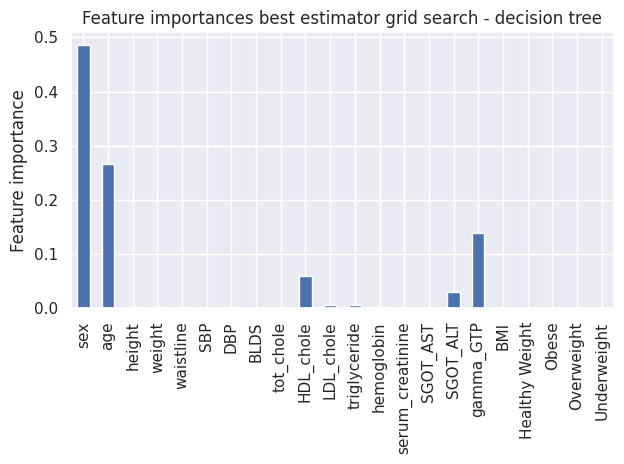

In [ ]:
std = np.std(best_decision_tree.feature_importances_, axis=0)
decision_tree_feature_importances = pd.Series(best_decision_tree.feature_importances_, index=X_train_drinking.columns)

fig, ax = plt.subplots()
decision_tree_feature_importances.plot.bar(ax=ax)
ax.set_title("Feature importances best estimator grid search - decision tree")
ax.set_ylabel("Feature importance")
fig.tight_layout()

We can see that from the 22 features only 5 have an impact during the prediction of the decision tree. The most important ones are "sex" and "age".

## Random Forest

Lets proceed with the Random Forest classifier using the same approch we used for the Decision Tree.

### Default values

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_drinking, y_train_drinking)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = dt.predict(X_valid_drinking)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_valid_drinking, y_pred))

Accuracy: 0.7216035185409353


### Number of estimators

In [ ]:
numbers_estimators = [50, 100, 200]
training_results = []
validation_results = []
for number_estimators in numbers_estimators:
  rf = RandomForestClassifier(n_estimators=int(number_estimators), random_state=42)
  rf.fit(X_train_drinking, y_train_drinking)

  # training
  y_train_pred = rf.predict(X_train_drinking)
  accuracy_training = metrics.accuracy_score(y_train_drinking, y_train_pred)
  training_results.append(accuracy_training)

  # validation
  y_pred = rf.predict(X_valid_drinking)
  accuracy_valid = metrics.accuracy_score(y_valid_drinking, y_pred)
  validation_results.append(accuracy_valid)


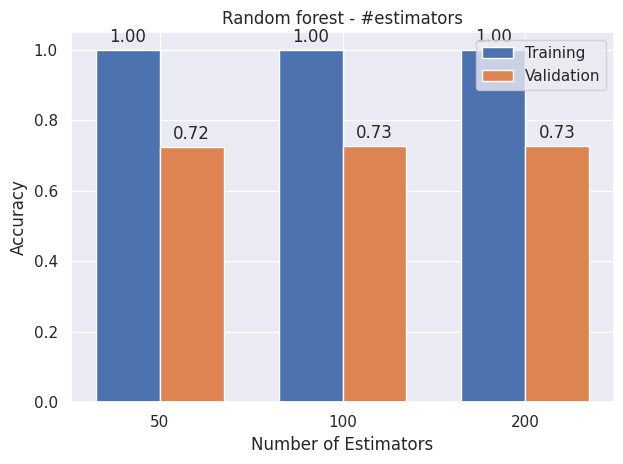

In [ ]:
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(numbers_estimators))

bar1 = ax.bar(index - bar_width/2, training_results, bar_width, label='Training')
bar2 = ax.bar(index + bar_width/2, validation_results, bar_width, label='Validation')

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

ax.set_title("Random forest - #estimators")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Estimators")
ax.set_xticks(index)
ax.set_xticklabels(numbers_estimators)
ax.legend()
fig.tight_layout()

plt.show()

We have found that using 200 estimators doesn't give us a better result than using 100 estimators.

Now we train the Random Forest classifier with the best value of the parameters we have found already for the Decision Tree and using 100 estimators.

In [ ]:
random_forest = RandomForestClassifier(criterion='gini', max_depth=10, max_features=None, min_samples_split=0.003, n_estimators=100, random_state=42)
random_forest.fit(X_train_drinking, y_train_drinking)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=0.003,
                       random_state=42)

In [ ]:
y_pred_rf = random_forest.predict(X_test_drinking)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_drinking, y_pred_rf))

Accuracy: 0.7266624298914579


No significant improvement has been made.

### Feature Importance

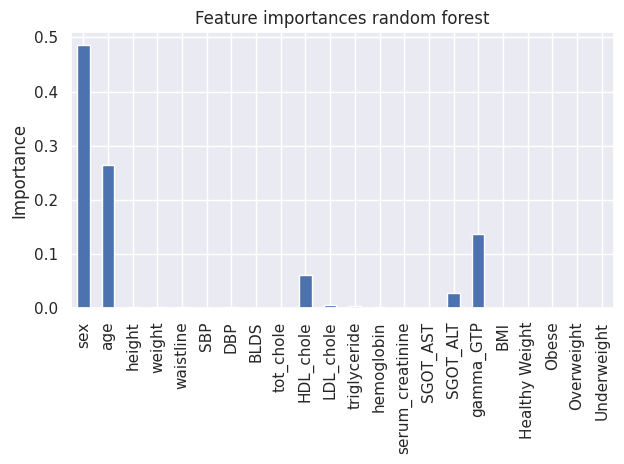

In [ ]:
std = np.std([random_forest.feature_importances_ for tree in random_forest.estimators_], axis=0)
forest_importances = pd.Series(random_forest.feature_importances_, index=X_drinking.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances Random Forest")
ax.set_ylabel("Importance")
fig.tight_layout()

# Ensemble methods

Construct a set of classifiers from the training data.

Predict class label of previously unseen records by
aggregating predictions made by multiple classifiers.

## Bagging

In [ ]:
bg = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, max_features=None, min_samples_split=0.003, random_state=42),random_state=42, verbose=1)
# n_estimator default is 10

In [ ]:
bg.fit(X_train_drinking, y_train_drinking)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   min_samples_split=0.003,
                                                   random_state=42),
                  random_state=42, verbose=1)

In [ ]:
y_pred = bg.predict(X_valid_drinking)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_valid_drinking, y_pred))

Accuracy: 0.7243523786466529


#### Sampling dataset

In [ ]:
params = {'max_samples': [0.5, 0.6, 0.7, 0.8], 'bootstrap': [False, True], 'n_estimators': [10, 20, 30]}
grid_search_cv_bagging = GridSearchCV(bg, params, scoring='accuracy', verbose=3, cv=2)

grid_search_cv_bagging.fit(X_train_drinking, y_train_drinking)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END bootstrap=False, max_samples=0.5, n_estimators=10;, score=0.726 total time=  15.8s
[CV 2/2] END bootstrap=False, max_samples=0.5, n_estimators=10;, score=0.725 total time=  15.8s
[CV 1/2] END bootstrap=False, max_samples=0.5, n_estimators=20;, score=0.727 total time=  30.9s
[CV 2/2] END bootstrap=False, max_samples=0.5, n_estimators=20;, score=0.725 total time=  30.8s
[CV 1/2] END bootstrap=False, max_samples=0.5, n_estimators=30;, score=0.727 total time=  46.4s
[CV 2/2] END bootstrap=False, max_samples=0.5, n_estimators=30;, score=0.725 total time=  48.7s
[CV 1/2] END bootstrap=False, max_samples=0.6, n_estimators=10;, score=0.726 total time=  18.7s
[CV 2/2] END bootstrap=False, max_samples=0.6, n_estimators=10;, score=0.725 total time=  19.8s
[CV 1/2] END bootstrap=False, max_samples=0.6, n_estimators=20;, score=0.727 total time=  36.8s
[CV 2/2] END bootstrap=False, max_samples=0.6, n_estimators=20;, score=0.72

GridSearchCV(cv=2,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                                          min_samples_split=0.003,
                                                                          random_state=42),
                                         random_state=42, verbose=1),
             param_grid={'bootstrap': [False, True],
                         'max_samples': [0.5, 0.6, 0.7, 0.8],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search_cv_bagging.best_estimator_

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   min_samples_split=0.003,
                                                   random_state=42),
                  max_samples=0.8, n_estimators=30, random_state=42, verbose=1)

In [ ]:
grid_search_cv_bagging.best_params_

{'bootstrap': True, 'max_samples': 0.8, 'n_estimators': 30}

In [ ]:
y_val_pred = grid_search_cv_bagging.predict(X_valid_drinking)
accuracy_score(y_valid_drinking, y_val_pred)

0.7247357059274503

#### Sampling features

In [ ]:
bagging_best_estimator = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,  min_samples_split=0.003, random_state=42), max_samples=0.8, n_estimators=30, random_state=42, verbose=1)
params = {'max_features': [0.3, 0.5, 0.8, 1], 'bootstrap_features': [True]}
grid_search_cv_bagging = GridSearchCV(bagging_best_estimator, params, scoring='accuracy', verbose=3, cv=2)

grid_search_cv_bagging.fit(X_train_drinking, y_train_drinking)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END bootstrap_features=True, max_features=0.3;, score=0.704 total time=  20.9s
[CV 2/2] END bootstrap_features=True, max_features=0.3;, score=0.704 total time=  16.6s
[CV 1/2] END bootstrap_features=True, max_features=0.5;, score=0.713 total time=  26.2s
[CV 2/2] END bootstrap_features=True, max_features=0.5;, score=0.713 total time=  27.3s
[CV 1/2] END bootstrap_features=True, max_features=0.8;, score=0.716 total time=  44.5s
[CV 2/2] END bootstrap_features=True, max_features=0.8;, score=0.716 total time=  42.2s
[CV 1/2] END bootstrap_features=True, max_features=1;, score=0.680 total time=   3.4s
[CV 2/2] END bootstrap_features=True, max_features=1;, score=0.680 total time=   3.3s


GridSearchCV(cv=2,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                                          min_samples_split=0.003,
                                                                          random_state=42),
                                         max_samples=0.8, n_estimators=30,
                                         random_state=42, verbose=1),
             param_grid={'bootstrap_features': [True],
                         'max_features': [0.3, 0.5, 0.8, 1]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search_cv_bagging.best_estimator_

BaggingClassifier(bootstrap_features=True,
                  estimator=DecisionTreeClassifier(max_depth=10,
                                                   min_samples_split=0.003,
                                                   random_state=42),
                  max_features=0.8, max_samples=0.8, n_estimators=30,
                  random_state=42, verbose=1)

In [ ]:
grid_search_cv_bagging.best_params_

{'bootstrap_features': True, 'max_features': 0.8}

In [ ]:
y_val_pred = grid_search_cv_bagging.predict(X_valid_drinking)
accuracy_score(y_valid_drinking, y_val_pred)

0.7149659040471291

#### Final testing Bagging


We saw that sampling features of dataset didn't bring any advantage. So we will test the initial bagging without sampling.

In [ ]:
bagging_best_estimator = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,  min_samples_split=0.003, random_state=42), max_samples=0.8, n_estimators=30, random_state=42, verbose=1)
bagging_best_estimator.fit(X_train_drinking, y_train_drinking)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   min_samples_split=0.003,
                                                   random_state=42),
                  max_samples=0.8, n_estimators=30, random_state=42, verbose=1)

In [ ]:
y_val_pred = bagging_best_estimator.predict(X_test_drinking)
accuracy_score(y_test_drinking, y_val_pred)

0.7264707662510592

## Adaboost

Given the fact that Adaboost is slow (base_estimator fitted sequentially) we won't use Grid search.
As base_estimator we will use DecisionTreeClassifier:


*   n_estimators=50; learning_rate=0.4, algorithm='SAMME.R' => test set accuracy: 0.730; train set accuracy: 0.741
*   n_estimators=20; learning_rate=0.4, algorithm='SAMME.R' => test set accuracy: 0.731; train set accuracy: 0.745


*   n_estimators=50; learning_rate=0.1, algorithm='SAMME.R' => test set accuracy: **0.733**; train set accuracy: 0.746
*   n_estimators=20; learning_rate=0.1, algorithm='SAMME.R' => test set accuracy: 0.731; train set accuracy: 0.739



In [ ]:
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, max_features=None, min_samples_split=0.003, random_state=42), n_estimators=50, learning_rate=0.4, algorithm='SAMME.R', random_state=42)

In [ ]:
adaboost.fit(X_train_drinking, y_train_drinking)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                    min_samples_split=0.003,
                                                    random_state=42),
                   learning_rate=0.4, n_estimators=20, random_state=42)

In [ ]:
y_pred = adaboost.predict(X_test_drinking)

In [ ]:
y_pred_training = adaboost.predict(X_train_drinking)

In [ ]:
print("Training Accuracy:",metrics.accuracy_score(y_train_drinking, y_pred_training))

Training Accuracy: 0.7453647661703587


In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y_test_drinking, y_pred))

Testing Accuracy: 0.7311463503207845


## XGBoost

XGBoost is based on Gradient
Boosting: a special case of boosting where errors are
minimized by gradient descent algorithm

#### Grid Search


In [ ]:
params = {'max_depth': [3, 5, 10], 'n_estimators': [50, 100], 'learning_rate': [0.001, 0.01, 0.1], 'sampling_method': ['uniform', 'gradient_based'],
          'tree_method': ['auto', 'exact']}
grid_search_cv2 = GridSearchCV(XGBClassifier(booster='gbtree', eval_metric='logloss', random_state=42, verbosity=2), params, scoring='accuracy', verbose=3, cv=2)

grid_search_cv2.fit(X_train_drinking, y_train_drinking)

Output streaming troncato alle ultime 5000 righe.
[09:56:32] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:56:32] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:56:33] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:56:33] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:56:34] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:56:34] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:56:34] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:56:35] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, ma

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
144 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1515, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
 

[11:22:10] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[11:22:11] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[11:22:12] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[11:22:13] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[11:22:13] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[11:22:14] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[11:22:15] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[11:22:16] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[11:22:18] INFO: /workspace/src/tree/upd

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_r...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [20, 50, 100, None],
                         'sampling_method': ['uniform', 'gradient_based'],
                         'tree_method': ['auto', 'exact', 'approx']},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search_cv2.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'sampling_method': 'uniform',
 'tree_method': 'exact'}

In [ ]:
grid_search_cv2.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred2 = grid_search_cv2.predict(X_valid_drinking)
accuracy_score(y_valid_drinking, y_pred2)

0.7318423919622322

In [ ]:
xgb = XGBClassifier(booster='gbtree', eval_metric='logloss', max_depth=5, learning_rate=0.1, n_estimators=100, sampling_method='uniform', tree_method='exact', random_state=42, verbosity=3)

In [ ]:
xgb.fit(X_train_drinking, y_train_drinking)

[13:14:49] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 2
[13:14:51] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:14:52] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:14:53] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:14:54] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:14:56] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:14:59] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:15:03] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:15:05] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra no

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb.predict(X_test_drinking)

[13:17:00] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 2


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_drinking, y_pred))

Accuracy: 0.7332647379251906


### Feature Importance

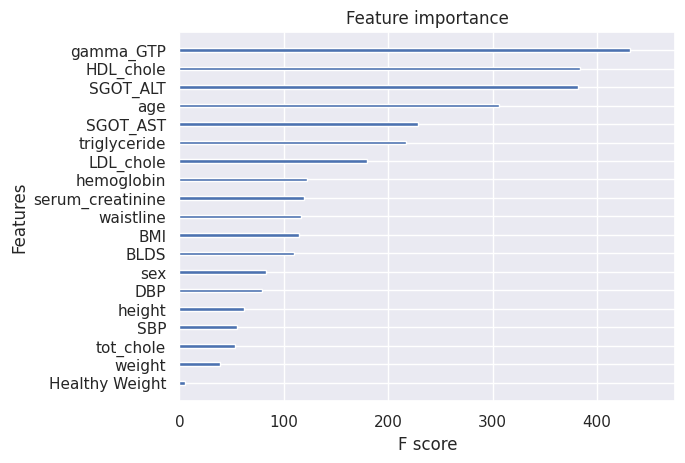

In [ ]:
# plot feature importance
plot_importance(xgb, importance_type='weight', show_values=False) # ”weight” is the number of times a feature appears in a tree
pyplot.show()

## GradientBoostingClassifier

Gradient boosting builds an ensemble of trees one-by-one, then the predictions of the individual trees are summed

#### Grid Search

In [ ]:
params = {'subsample': [0.5, 0.8],'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'n_estimators': [30, 50], 'max_features': ['sqrt', 'log2', None]}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(subsample=0.5, random_state=42), params, scoring='accuracy', verbose=3, cv=2)

grid_search_cv.fit(X_train_drinking, y_train_drinking)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=30, subsample=0.5;, score=0.694 total time=   7.2s
[CV 2/2] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=30, subsample=0.5;, score=0.695 total time=   6.3s
[CV 1/2] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=30, subsample=0.8;, score=0.694 total time=  13.3s
[CV 2/2] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=30, subsample=0.8;, score=0.695 total time=  12.0s
[CV 1/2] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.5;, score=0.697 total time=  14.8s
[CV 2/2] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.5;, score=0.698 total time=   9.5s
[CV 1/2] END learning_rate=0.01, max_depth=3, max_features=sqrt, n_estimators=50, subsample=0.8;, score=0.697 total time=  12.7s
[CV 2/2] END learning_rate=0.01, max

GridSearchCV(cv=2,
             estimator=GradientBoostingClassifier(random_state=42,
                                                  subsample=0.5),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [30, 50], 'subsample': [0.5, 0.8]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': None,
 'n_estimators': 50,
 'subsample': 0.5}

In [ ]:
y_pred = grid_search_cv.predict(X_valid_drinking)
accuracy_score(y_valid_drinking, y_pred)

0.7292599765968607

In [ ]:
grid_search_cv.best_score_

0.7308958425802634

#### Final testing Gradient Boosting

In [ ]:
xgboost = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, max_features=None, subsample=0.5, random_state=42).fit(X_train_drinking, y_train_drinking)

In [ ]:
xgboost.score(X_test_drinking, y_test_drinking)

0.7310505185005851

## Stacking


To combine predictions of base learners, don’t vote,
use meta learner. In particular: Base-Models and Meta-Mode

In [ ]:
estimators = [
    ("XGBoost", XGBClassifier(booster='gbtree', eval_metric='logloss', max_depth=5, learning_rate=0.1, n_estimators=100, sampling_method='uniform', tree_method='exact', random_state=42, verbosity=3)),
    ('Decision Tree', DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, max_features=None, min_samples_split=0.003, random_state=42)),
]

Default final estimator: LogisticRegression

In [ ]:
stacking = StackingClassifier(estimators=estimators, final_estimator=None, cv=2, stack_method='auto', n_jobs=None, passthrough=False, verbose=0)

In [ ]:
stacking.fit(X_train_drinking, y_train_drinking)

[14:14:23] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 2
[14:14:25] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[14:14:25] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[14:14:26] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[14:14:27] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[14:14:28] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[14:14:28] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[14:14:29] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[14:14:30] INFO: /workspace/src/tree/updater_prune.cc:80: tree pruning end, 62 extra no

StackingClassifier(cv=2,
                   estimators=[('XGBoost',
                                XGBClassifier(base_score=None, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constrai...
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('Decision Tree',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_split=0.003,
                                                       random_state=42))])

In [ ]:
y_pred = stacking.predict(X_test_drinking)

[14:18:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 2


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_drinking, y_pred))

Accuracy: 0.7332546503651697


# SVM

Given the fact that SVM doesn't work on big dataset because would require a lot of computional and memory capabilites, we had to drop a portion of out training set.

(https://ai.stackexchange.com/questions/7202/why-does-training-an-svm-take-so-long-how-can-i-speed-it-up)



In [ ]:
X_train_drinking_svm, _, y_train_drinking_svm, _ = train_test_split(X_train_drinking, y_train_drinking, test_size=0.98, stratify=y_train_drinking, random_state=42)
X_test_drinking_svm, _, y_test_drinking_svm, _ = train_test_split(X_test_drinking, y_test_drinking, test_size=0.98, stratify=y_test_drinking, random_state=42)
X_valid_drinking_svm, _, y_valid_drinking_svm, _  = train_test_split(X_valid_drinking, y_valid_drinking, test_size=0.98, stratify=y_valid_drinking, random_state=42)

In [ ]:
print("Len of X_train_drinking_svm: " + str(len(X_train_drinking_svm)))

counts = Counter(y_train_drinking_svm)

print("\nY Train")
for value, count in counts.items():
    print(f"{value}: {count}")

Len of X_train_drinking_svm: 11895

Y Train
0: 5942
1: 5953


In [ ]:
print("Len of X_test_drinking_svm: " + str(len(X_test_drinking_svm)))

counts = Counter(y_test_drinking_svm)

print("\nY Test")
for value, count in counts.items():
    print(f"{value}: {count}")

Len of X_test_drinking_svm: 3965

Y Test
0: 1990
1: 1975


In [ ]:
print("Len of X_valid_drinking_svm: " + str(len(X_valid_drinking_svm)))

counts = Counter(y_valid_drinking_svm)

print("\nY Valid")
for value, count in counts.items():
    print(f"{value}: {count}")

Len of X_valid_drinking_svm: 3965

Y Valid
0: 1984
1: 1981


We drop 98% of the rows and we can see how the proportion of the class (Drinker = 0 or 1) didn't change.

### Data Split and Feature Scaling

Data before scaling

In [ ]:
X_train_drinking_svm.describe()

,sex,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,...,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,BMI,Healthy Weight,Obese,Overweight,Underweight
count,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,...,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000,11895.000000
mean,0.535519,47.727196,162.259773,63.270282,81.113657,122.180328,75.952669,98.072047,195.357797,56.776377,...,14.241471,0.851240,24.483270,23.438420,30.213619,23.901602,0.622699,0.044304,0.289029,0.043968
std,0.498758,14.237322,9.352940,12.585126,9.585112,13.977909,9.531634,14.109058,37.220681,14.401679,...,1.567095,0.195663,7.641299,11.791725,19.582305,3.502192,0.484732,0.205779,0.453330,0.205033
min,0.000000,20.000000,135.000000,30.000000,53.550000,83.500000,52.000000,62.500000,94.000000,16.000000,...,6.900000,0.250000,8.000000,3.000000,1.000000,14.568158,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.000000,155.000000,55.000000,74.000000,112.000000,70.000000,89.000000,169.000000,46.000000,...,13.200000,0.700000,19.000000,15.000000,15.000000,21.484375,0.000000,0.000000,0.000000,0.000000
50%,1.000000,45.000000,160.000000,60.000000,81.000000,120.000000,76.000000,96.000000,194.000000,55.000000,...,14.300000,0.800000,23.000000,20.000000,23.000000,23.875115,1.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,170.000000,70.000000,87.300000,130.000000,81.000000,105.000000,219.000000,66.000000,...,15.400000,1.000000,28.000000,29.000000,39.000000,25.951557,1.000000,0.000000,1.000000,0.000000
max,1.000000,85.000000,190.000000,130.000000,108.350000,159.500000,100.000000,130.500000,294.000000,96.000000,...,22.000000,1.450000,41.500000,50.000000,73.500000,42.448980,1.000000,1.000000,1.000000,1.000000


Data after scaling

In [ ]:
scaler = StandardScaler()

X_train_drinking_svm = scaler.fit_transform(X_train_drinking_svm)
X_test_drinking_svm = scaler.transform(X_test_drinking_svm)
X_valid_drinking_svm = scaler.transform(X_valid_drinking_svm)

X_train_drinking_svm = pd.DataFrame(X_train_drinking_svm)
X_test_drinking_svm = pd.DataFrame(X_test_drinking_svm)
X_valid_drinking_svm = pd.DataFrame(X_valid_drinking_svm)

X_train_drinking_svm.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,...,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04,1.189500e+04
mean,-8.840717e-17,-1.869692e-16,-6.899343e-16,7.765494e-18,-9.382808e-16,3.763278e-17,3.124118e-16,-1.971241e-17,2.269914e-17,2.120577e-16,...,2.532746e-16,-2.156418e-16,1.385842e-16,1.123010e-16,2.688056e-18,-3.416818e-16,6.869476e-17,7.646025e-17,-3.703543e-17,-2.389383e-18
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,...,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.073751e+00,-1.947583e+00,-2.914690e+00,-2.643730e+00,-2.875795e+00,-2.767363e+00,-2.513071e+00,-2.521327e+00,-2.723273e+00,-2.831482e+00,...,-4.684961e+00,-3.072966e+00,-2.157220e+00,-1.733358e+00,-1.491900e+00,-2.665141e+00,-1.284679e+00,-2.153095e-01,-6.375948e-01,-2.144531e-01
25%,-1.073751e+00,-8.939695e-01,-7.762348e-01,-6.571749e-01,-7.421881e-01,-7.283461e-01,-6.245434e-01,-6.430216e-01,-7.081790e-01,-7.483037e-01,...,-6.646150e-01,-7.729949e-01,-7.176137e-01,-7.156522e-01,-7.769391e-01,-6.902329e-01,-1.284679e+00,-2.153095e-01,-6.375948e-01,-2.144531e-01
50%,9.313146e-01,-1.915607e-01,-2.416211e-01,-2.598638e-01,-1.185816e-02,-1.559904e-01,4.965864e-03,-1.468655e-01,-3.648118e-02,-1.233503e-01,...,3.735016e-02,-2.618902e-01,-1.941205e-01,-2.916082e-01,-3.683898e-01,-7.563317e-03,7.784043e-01,-2.153095e-01,-6.375948e-01,-2.144531e-01
75%,9.313146e-01,8.620525e-01,8.276063e-01,5.347583e-01,6.454388e-01,5.594543e-01,5.295569e-01,4.910494e-01,6.352166e-01,6.404816e-01,...,7.393154e-01,7.603194e-01,4.602460e-01,4.716710e-01,4.487087e-01,5.853594e-01,7.784043e-01,-2.153095e-01,1.568394e+00,-2.144531e-01
max,9.313146e-01,2.618075e+00,2.966061e+00,5.302491e+00,2.841645e+00,2.670016e+00,2.523003e+00,2.298475e+00,2.650310e+00,2.723660e+00,...,4.951107e+00,3.060291e+00,2.227036e+00,2.252656e+00,2.210577e+00,5.296156e+00,7.784043e-01,4.644476e+00,1.568394e+00,4.663023e+00


### Default hyperparameters

In [ ]:
svc=SVC()

svc.fit(X_train_drinking_svm, y_train_drinking_svm)

y_pred=svc.predict(X_valid_drinking_svm)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_valid_drinking_svm, y_pred)))

Model accuracy score with default hyperparameters: 0.7284


### Linear Kernel

C: Regularization parameter

In [ ]:
linear_svc=SVC(kernel='linear', C=1.0)

linear_svc.fit(X_train_drinking_svm,y_train_drinking_svm)

y_pred=linear_svc.predict(X_valid_drinking_svm)

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid_drinking_svm, y_pred)))

Model accuracy score with linear kernel and C=1.0 : 0.7241


In [ ]:
linear_svc=SVC(kernel='linear', C=100.0)

linear_svc.fit(X_train_drinking_svm,y_train_drinking_svm)

y_pred=linear_svc.predict(X_valid_drinking_svm)

print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid_drinking_svm, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.7243


### Sigmoid and rbf kernel

gamma: Kernel coefficient

In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)

sigmoid_svc.fit(X_train_drinking_svm,y_train_drinking_svm)

y_pred=sigmoid_svc.predict(X_valid_drinking_svm)

print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid_drinking_svm, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.6323


In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=100.0)

sigmoid_svc.fit(X_train_drinking_svm,y_train_drinking_svm)

y_pred=sigmoid_svc.predict(X_valid_drinking_svm)

print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid_drinking_svm, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.6265


In [ ]:
rbf_svc=SVC(kernel='rbf', C=10.0, gamma=0.01)

rbf_svc.fit(X_train_drinking_svm,y_train_drinking_svm)

y_pred=rbf_svc.predict(X_valid_drinking_svm)

print('Model accuracy score with rbf kernel and C=10.0, gamma = 0.01 : {0:0.4f}'. format(accuracy_score(y_valid_drinking_svm, y_pred)))

Model accuracy score with rbf kernel and C=10.0, gamma = 0.01 : 0.7294


Final Test on SVM

In [ ]:
y_pred=rbf_svc.predict(X_test_drinking_svm)

print('TEST: Model accuracy score with rbf kernel and C=10.0, gamma = 0.01 : {0:0.4f}'. format(accuracy_score(y_test_drinking_svm, y_pred)))

TEST: Model accuracy score with rbf kernel and C=10.0, gamma = 0.01 : 0.7170


Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1-score = 2 * precision * recall / (precision + recall)

In [ ]:
print(classification_report(y_test_drinking_svm, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1990
           1       0.70      0.75      0.73      1975

    accuracy                           0.72      3965
   macro avg       0.72      0.72      0.72      3965
weighted avg       0.72      0.72      0.72      3965



# Clustering

### Kmeans


K-means is probably not the thing to reach for when approaching classification problems. Classification suggests a supervised problem with a labelled training set. i.e. you already have classes and members of each class.

Whereas K-means is generally used in an unsupervised context when we need a quick and dirty way to split of a multivariate dataset into a predetermined number of clusters.

# Neural Network

##Try simple Neural Network

In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation="relu", input_shape=(22,)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_drinking, y_train_drinking, validation_data=[X_valid_drinking, y_valid_drinking], batch_size = 256, epochs=10)

model.evaluate(X_test_drinking,  y_test_drinking)

Epoch 1/10
2324/2324 [==============================] - 21s 8ms/step - loss: 0.5560 - accuracy: 0.7157 - val_loss: 0.5571 - val_accuracy: 0.7135
Epoch 2/10
2324/2324 [==============================] - 14s 6ms/step - loss: 0.5434 - accuracy: 0.7244 - val_loss: 0.5410 - val_accuracy: 0.7243
Epoch 3/10
2324/2324 [==============================] - 14s 6ms/step - loss: 0.5422 - accuracy: 0.7253 - val_loss: 0.5439 - val_accuracy: 0.7224
Epoch 4/10
2324/2324 [==============================] - 16s 7ms/step - loss: 0.5429 - accuracy: 0.7251 - val_loss: 0.5503 - val_accuracy: 0.7159
Epoch 5/10
2324/2324 [==============================] - 15s 7ms/step - loss: 0.5429 - accuracy: 0.7253 - val_loss: 0.5455 - val_accuracy: 0.7238
Epoch 6/10
2324/2324 [==============================] - 15s 6ms/step - loss: 0.5430 - accuracy: 0.7257 - val_loss: 0.5524 - val_accuracy: 0.7168
Epoch 7/10
2324/2324 [==============================] - 15s 7ms/step - loss: 0.5426 - accuracy: 0.7258 - val_loss: 0.5933 - val_ac

[0.5490153431892395, 0.7218103408813477]

##Grid Search CV

Now, let's enhance the neural network by identifying the best parameters through **Grid Search**

### Build the model

In [ ]:
def create_model(neurons=32, activation='relu', optimizer='adam', dropout_rate=0.2):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(neurons, activation=activation, input_shape=(22,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(neurons//2, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(neurons//4, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(neurons//8, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(neurons//16, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

###Find the best hyperparameters

In [ ]:
classifier_model = KerasClassifier(model=create_model, verbose=0)

batch_size = [256]
epochs = [50]
optimizer = ['Adamax', 'SGD']
model__activation = ['relu', 'tanh', 'sigmoid']
model__dropout_rate = [0.2,0.4]
model__neurons = [256, 512]


Parameter_Trials = {
    'batch_size': batch_size,
    'epochs': epochs,
    'model__optimizer': optimizer,
    'model__activation': model__activation,
    'model__dropout_rate': model__dropout_rate,
    'model__neurons': model__neurons,
}

grid_search = GridSearchCV(estimator=classifier_model, param_grid=Parameter_Trials, cv=3)

grid_result = grid_search.fit(X_train, y_train, verbose=1)

We run the Grid Search on the **UniBs Cluster** because we had too many parameters and the Grid Search would have taken too much time.

The best run found on the cluster was:

 Best Accuracy: **0.732895**

Parameters:

*   'batch_size': 256
*   'epochs': 50
*   'model__activation': 'relu'
*   'model__dropout_rate': 0.2
*   'model__neurons': 256
*   'model__optimizer': 'Adamax'

## Model After Grid Search

In [ ]:
model = create_model(neurons=256, activation='relu', optimizer='Adamax', dropout_rate=0.2)

In [ ]:
model.fit(X_train, y_train, validation_split=0.2, batch_size = 256, epochs=10)

Epoch 1/10
2479/2479 [==============================] - 141s 57ms/step - loss: 0.5471 - accuracy: 0.7233 - val_loss: 0.5477 - val_accuracy: 0.7204
Epoch 2/10
2479/2479 [==============================] - 133s 54ms/step - loss: 0.5392 - accuracy: 0.7284 - val_loss: 0.5578 - val_accuracy: 0.7189
Epoch 3/10
2479/2479 [==============================] - 130s 52ms/step - loss: 0.5366 - accuracy: 0.7294 - val_loss: 0.5397 - val_accuracy: 0.7323
Epoch 4/10
2479/2479 [==============================] - 128s 52ms/step - loss: 0.5354 - accuracy: 0.7298 - val_loss: 0.5352 - val_accuracy: 0.7303
Epoch 5/10
2479/2479 [==============================] - 125s 51ms/step - loss: 0.5345 - accuracy: 0.7303 - val_loss: 0.5419 - val_accuracy: 0.7317
Epoch 6/10
2479/2479 [==============================] - 128s 52ms/step - loss: 0.5339 - accuracy: 0.7307 - val_loss: 0.5342 - val_accuracy: 0.7312
Epoch 7/10
2479/2479 [==============================] - 131s 53ms/step - loss: 0.5333 - accuracy: 0.7310 - val_loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(X_test_drinking, y_test_drinking, verbose=2)

print('\nTest accuracy:', test_acc)

6196/6196 - 22s - loss: 0.5305 - accuracy: 0.7335 - 22s/epoch - 4ms/step

Test accuracy: 0.7335219979286194


After the use of the Grid Search we get an accuracy of **0.733**

## Optuna

Now we try another approach with a different NN, also we try another automatic hyperparameter optimizator called **Optuna**

In [ ]:
def create_model(neurons1=32, neurons2=32, start_activation='relu', activation="relu", last_activation = "sigmoid", initializer1="glorot_normal", regularizer="l1_l2", initializer2="he_normal", layers = 2, optimizer='adam', dropout_rate=0.2):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=neurons1, activation=start_activation, input_shape=(22,)))

    for _ in range(layers):
      if activation == "tanh" or activation == "sigmoid":
        initializer = initializer1
      else:
        initializer = initializer2

      model.add(tf.keras.layers.Dense(units = neurons2,
                                      activation=activation,
                                      kernel_initializer=initializer,
                                      kernel_regularizer=regularizer))
      model.add(tf.keras.layers.BatchNormalization())
      model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(1, activation=last_activation))

    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])
    return model

In [ ]:
def objective(trial):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units = trial.suggest_categorical("neurons1", [16,32,128,256,512,1024]), activation=trial.suggest_categorical("start_activation", ["relu", "elu", "tanh", "sigmoid"]), input_shape=(22,)))

  for _ in range(trial.suggest_int("layers", 2, 6)):

    activation = trial.suggest_categorical("activation", ["relu", "elu", "tanh", "sigmoid"])
    if activation == "tanh" or activation == "sigmoid":
      initializer = trial.suggest_categorical("initializer1", ["glorot_normal", "glorot_uniform"])
    else:
      initializer = trial.suggest_categorical("initializer2", ["he_normal", "he_uniform"])

    regularizer = trial.suggest_categorical("regularizer", ["l1", "l1_l2"])

    model.add(tf.keras.layers.Dense(units = trial.suggest_categorical("neurons2", [16,32,128,256,512,1024]),
                                    activation=activation,
                                    kernel_initializer=initializer,
                                    kernel_regularizer=regularizer))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(trial.suggest_float("dropout", 0.2, 0.4)))

  model.add(tf.keras.layers.Dense(1, activation=trial.suggest_categorical("last_activation", ["linear", "sigmoid"])))

  model.compile(optimizer=trial.suggest_categorical("optimizer", ["Adam", "Adamax", "SGD"]), loss="binary_crossentropy", metrics=['accuracy'])

  model.fit(X_train, y_train, validation_data=(X_valid_drinking, y_valid_drinking), batch_size = 1024, epochs=10)

  valid_loss, valid_acc = model.evaluate(X_valid_drinking, y_valid_drinking)

  return valid_acc


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-12-15 09:30:31,243] A new study created in memory with name: no-name-f86f12d0-1298-4a41-bb3d-1207a99b7ba9


Epoch 1/10
581/581 [==============================] - 12s 13ms/step - loss: 387.9124 - accuracy: 0.5604 - val_loss: 208.9787 - val_accuracy: 0.5084
Epoch 2/10
581/581 [==============================] - 6s 11ms/step - loss: 191.9029 - accuracy: 0.5571 - val_loss: 141.9823 - val_accuracy: 0.5445
Epoch 3/10
581/581 [==============================] - 7s 12ms/step - loss: 202.3168 - accuracy: 0.5070 - val_loss: 169.4975 - val_accuracy: 0.4995
Epoch 4/10
581/581 [==============================] - 7s 11ms/step - loss: 140.0583 - accuracy: 0.4964 - val_loss: 131.1126 - val_accuracy: 0.4995
Epoch 5/10
581/581 [==============================] - 7s 11ms/step - loss: 125.8074 - accuracy: 0.4958 - val_loss: 118.5060 - val_accuracy: 0.5114
Epoch 6/10
581/581 [==============================] - 7s 12ms/step - loss: 142.5217 - accuracy: 0.5035 - val_loss: 157.7728 - val_accuracy: 0.5005
Epoch 7/10
581/581 [==============================] - 6s 11ms/step - loss: 128.6554 - accuracy: 0.4999 - val_loss: 11

[I 2023-12-15 09:32:18,010] Trial 0 finished with value: 0.5005043745040894 and parameters: {'neurons1': 256, 'start_activation': 'tanh', 'layers': 6, 'activation': 'relu', 'initializer2': 'he_uniform', 'regularizer': 'l1', 'neurons2': 512, 'dropout': 0.3498367929864463, 'last_activation': 'linear', 'optimizer': 'Adam'}. Best is trial 0 with value: 0.5005043745040894.


Epoch 1/10
581/581 [==============================] - 11s 16ms/step - loss: 324.1075 - accuracy: 0.6183 - val_loss: 22.6442 - val_accuracy: 0.5843
Epoch 2/10
581/581 [==============================] - 9s 16ms/step - loss: 4.0466 - accuracy: 0.6844 - val_loss: 2.4660 - val_accuracy: 0.6963
Epoch 3/10
581/581 [==============================] - 9s 15ms/step - loss: 2.4467 - accuracy: 0.6991 - val_loss: 2.4504 - val_accuracy: 0.6854
Epoch 4/10
581/581 [==============================] - 9s 15ms/step - loss: 2.4471 - accuracy: 0.6984 - val_loss: 2.5174 - val_accuracy: 0.6847
Epoch 5/10
581/581 [==============================] - 9s 15ms/step - loss: 2.4445 - accuracy: 0.7002 - val_loss: 2.5198 - val_accuracy: 0.6646
Epoch 6/10
581/581 [==============================] - 9s 16ms/step - loss: 2.4495 - accuracy: 0.6952 - val_loss: 2.4651 - val_accuracy: 0.6862
Epoch 7/10
581/581 [==============================] - 10s 17ms/step - loss: 2.4549 - accuracy: 0.6904 - val_loss: 2.5273 - val_accuracy: 0

[I 2023-12-15 09:34:11,251] Trial 1 finished with value: 0.7027044892311096 and parameters: {'neurons1': 512, 'start_activation': 'tanh', 'layers': 4, 'activation': 'tanh', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 1024, 'dropout': 0.3103402943738933, 'last_activation': 'sigmoid', 'optimizer': 'SGD'}. Best is trial 1 with value: 0.7027044892311096.


Epoch 1/10
581/581 [==============================] - 11s 13ms/step - loss: 574.9688 - accuracy: 0.5318 - val_loss: 376.0929 - val_accuracy: 0.4973
Epoch 2/10
581/581 [==============================] - 6s 11ms/step - loss: 218.4917 - accuracy: 0.5115 - val_loss: 143.3999 - val_accuracy: 0.4973
Epoch 3/10
581/581 [==============================] - 6s 11ms/step - loss: 170.6515 - accuracy: 0.5137 - val_loss: 194.9748 - val_accuracy: 0.5109
Epoch 4/10
581/581 [==============================] - 7s 12ms/step - loss: 311.3416 - accuracy: 0.5013 - val_loss: 503.2015 - val_accuracy: 0.4797
Epoch 5/10
581/581 [==============================] - 6s 11ms/step - loss: 358.9827 - accuracy: 0.5021 - val_loss: 258.4488 - val_accuracy: 0.5274
Epoch 6/10
581/581 [==============================] - 7s 13ms/step - loss: 6910.6245 - accuracy: 0.5123 - val_loss: 12872.9443 - val_accuracy: 0.5052
Epoch 7/10
581/581 [==============================] - 6s 10ms/step - loss: 11314.5449 - accuracy: 0.5139 - val_los

[I 2023-12-15 09:36:04,684] Trial 2 finished with value: 0.4809698164463043 and parameters: {'neurons1': 32, 'start_activation': 'elu', 'layers': 6, 'activation': 'relu', 'initializer2': 'he_normal', 'regularizer': 'l1_l2', 'neurons2': 512, 'dropout': 0.36922279189561097, 'last_activation': 'linear', 'optimizer': 'SGD'}. Best is trial 1 with value: 0.7027044892311096.


Epoch 1/10
581/581 [==============================] - 9s 10ms/step - loss: 30.2148 - accuracy: 0.6955 - val_loss: 1.0884 - val_accuracy: 0.5005
Epoch 2/10
581/581 [==============================] - 7s 11ms/step - loss: 0.9975 - accuracy: 0.7255 - val_loss: 1.0377 - val_accuracy: 0.7196
Epoch 3/10
581/581 [==============================] - 6s 10ms/step - loss: 1.0863 - accuracy: 0.7282 - val_loss: 1.1458 - val_accuracy: 0.6966
Epoch 4/10
581/581 [==============================] - 7s 12ms/step - loss: 1.1313 - accuracy: 0.7290 - val_loss: 1.1341 - val_accuracy: 0.7215
Epoch 5/10
581/581 [==============================] - 5s 9ms/step - loss: 1.1328 - accuracy: 0.7298 - val_loss: 1.2185 - val_accuracy: 0.6342
Epoch 6/10
581/581 [==============================] - 7s 11ms/step - loss: 1.1276 - accuracy: 0.7300 - val_loss: 1.3614 - val_accuracy: 0.5915
Epoch 7/10
581/581 [==============================] - 6s 11ms/step - loss: 1.1233 - accuracy: 0.7306 - val_loss: 1.3838 - val_accuracy: 0.5634

[I 2023-12-15 09:37:48,531] Trial 3 finished with value: 0.6448825597763062 and parameters: {'neurons1': 1024, 'start_activation': 'sigmoid', 'layers': 5, 'activation': 'elu', 'initializer2': 'he_uniform', 'regularizer': 'l1', 'neurons2': 256, 'dropout': 0.29628874071504097, 'last_activation': 'sigmoid', 'optimizer': 'Adamax'}. Best is trial 1 with value: 0.7027044892311096.


Epoch 1/10
581/581 [==============================] - 8s 11ms/step - loss: 10.4345 - accuracy: 0.5005 - val_loss: 10.5873 - val_accuracy: 0.5005
Epoch 2/10
581/581 [==============================] - 5s 9ms/step - loss: 11.3301 - accuracy: 0.5004 - val_loss: 12.0323 - val_accuracy: 0.4995
Epoch 3/10
581/581 [==============================] - 5s 8ms/step - loss: 11.7614 - accuracy: 0.5005 - val_loss: 11.5485 - val_accuracy: 0.4995
Epoch 4/10
581/581 [==============================] - 6s 10ms/step - loss: 11.4290 - accuracy: 0.5008 - val_loss: 11.3630 - val_accuracy: 0.4995
Epoch 5/10
581/581 [==============================] - 5s 8ms/step - loss: 11.1403 - accuracy: 0.5005 - val_loss: 10.9918 - val_accuracy: 0.4995
Epoch 6/10
581/581 [==============================] - 5s 8ms/step - loss: 10.7863 - accuracy: 0.5006 - val_loss: 10.6873 - val_accuracy: 0.4995
Epoch 7/10
581/581 [==============================] - 6s 10ms/step - loss: 13.6553 - accuracy: 0.4999 - val_loss: 15.0612 - val_accura

[I 2023-12-15 09:39:33,112] Trial 4 finished with value: 0.49949562549591064 and parameters: {'neurons1': 16, 'start_activation': 'relu', 'layers': 4, 'activation': 'tanh', 'initializer1': 'glorot_uniform', 'regularizer': 'l1', 'neurons2': 16, 'dropout': 0.24448294982796673, 'last_activation': 'linear', 'optimizer': 'SGD'}. Best is trial 1 with value: 0.7027044892311096.


Epoch 1/10
581/581 [==============================] - 8s 9ms/step - loss: 17.4471 - accuracy: 0.4997 - val_loss: 18.0982 - val_accuracy: 0.5005
Epoch 2/10
581/581 [==============================] - 5s 8ms/step - loss: 17.0565 - accuracy: 0.4986 - val_loss: 15.5133 - val_accuracy: 0.4995
Epoch 3/10
581/581 [==============================] - 6s 11ms/step - loss: 18.0123 - accuracy: 0.4984 - val_loss: 53.6995 - val_accuracy: 0.4995
Epoch 4/10
581/581 [==============================] - 5s 8ms/step - loss: 48.4794 - accuracy: 0.5005 - val_loss: 43.4001 - val_accuracy: 0.4995
Epoch 5/10
581/581 [==============================] - 5s 8ms/step - loss: 38.9569 - accuracy: 0.4992 - val_loss: 34.9047 - val_accuracy: 0.4995
Epoch 6/10
581/581 [==============================] - 6s 10ms/step - loss: 31.5615 - accuracy: 0.5005 - val_loss: 28.5263 - val_accuracy: 0.4995
Epoch 7/10
581/581 [==============================] - 5s 8ms/step - loss: 25.9737 - accuracy: 0.5013 - val_loss: 23.6190 - val_accurac

[I 2023-12-15 09:40:49,541] Trial 5 finished with value: 0.49949562549591064 and parameters: {'neurons1': 32, 'start_activation': 'tanh', 'layers': 4, 'activation': 'elu', 'initializer2': 'he_uniform', 'regularizer': 'l1_l2', 'neurons2': 32, 'dropout': 0.2671833045341467, 'last_activation': 'linear', 'optimizer': 'SGD'}. Best is trial 1 with value: 0.7027044892311096.


Epoch 1/10
581/581 [==============================] - 11s 11ms/step - loss: 67.0257 - accuracy: 0.5987 - val_loss: 64.4301 - val_accuracy: 0.6468
Epoch 2/10
581/581 [==============================] - 7s 13ms/step - loss: 64.2884 - accuracy: 0.5919 - val_loss: 62.8971 - val_accuracy: 0.6300
Epoch 3/10
581/581 [==============================] - 6s 11ms/step - loss: 63.3567 - accuracy: 0.5812 - val_loss: 63.0300 - val_accuracy: 0.6478
Epoch 4/10
581/581 [==============================] - 7s 13ms/step - loss: 62.5598 - accuracy: 0.5968 - val_loss: 60.5155 - val_accuracy: 0.6419
Epoch 5/10
581/581 [==============================] - 6s 10ms/step - loss: 61.6926 - accuracy: 0.5876 - val_loss: 61.4727 - val_accuracy: 0.6503
Epoch 6/10
581/581 [==============================] - 7s 13ms/step - loss: 60.8326 - accuracy: 0.6025 - val_loss: 60.2985 - val_accuracy: 0.6503
Epoch 7/10
581/581 [==============================] - 6s 10ms/step - loss: 59.8051 - accuracy: 0.5883 - val_loss: 58.3798 - val_a

[I 2023-12-15 09:42:56,044] Trial 6 finished with value: 0.6516866683959961 and parameters: {'neurons1': 16, 'start_activation': 'sigmoid', 'layers': 6, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 128, 'dropout': 0.22746551827803071, 'last_activation': 'linear', 'optimizer': 'Adamax'}. Best is trial 1 with value: 0.7027044892311096.


Epoch 1/10
581/581 [==============================] - 6s 8ms/step - loss: 124.8567 - accuracy: 0.6380 - val_loss: 11.1815 - val_accuracy: 0.5005
Epoch 2/10
581/581 [==============================] - 5s 8ms/step - loss: 1.8701 - accuracy: 0.5675 - val_loss: 2.9443 - val_accuracy: 0.4995
Epoch 3/10
581/581 [==============================] - 5s 9ms/step - loss: 1.4129 - accuracy: 0.6439 - val_loss: 2.2788 - val_accuracy: 0.5005
Epoch 4/10
581/581 [==============================] - 4s 8ms/step - loss: 1.3679 - accuracy: 0.6732 - val_loss: 2.1929 - val_accuracy: 0.4995
Epoch 5/10
581/581 [==============================] - 5s 8ms/step - loss: 1.3426 - accuracy: 0.6866 - val_loss: 2.5120 - val_accuracy: 0.4996
Epoch 6/10
581/581 [==============================] - 5s 9ms/step - loss: 1.3271 - accuracy: 0.6927 - val_loss: 1.5227 - val_accuracy: 0.6827
Epoch 7/10
581/581 [==============================] - 4s 8ms/step - loss: 1.3137 - accuracy: 0.6986 - val_loss: 1.9986 - val_accuracy: 0.4995
Epo

[I 2023-12-15 09:44:36,119] Trial 7 finished with value: 0.5038585066795349 and parameters: {'neurons1': 256, 'start_activation': 'elu', 'layers': 2, 'activation': 'tanh', 'initializer1': 'glorot_uniform', 'regularizer': 'l1', 'neurons2': 1024, 'dropout': 0.3308644507616165, 'last_activation': 'sigmoid', 'optimizer': 'SGD'}. Best is trial 1 with value: 0.7027044892311096.


Epoch 1/10
581/581 [==============================] - 6s 7ms/step - loss: 3.1757 - accuracy: 0.7045 - val_loss: 0.6917 - val_accuracy: 0.7219
Epoch 2/10
581/581 [==============================] - 4s 8ms/step - loss: 0.6280 - accuracy: 0.7200 - val_loss: 0.6195 - val_accuracy: 0.7071
Epoch 3/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6038 - accuracy: 0.7240 - val_loss: 0.7178 - val_accuracy: 0.6459
Epoch 4/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6034 - accuracy: 0.7247 - val_loss: 0.6628 - val_accuracy: 0.6928
Epoch 5/10
581/581 [==============================] - 3s 6ms/step - loss: 0.6002 - accuracy: 0.7262 - val_loss: 1.0924 - val_accuracy: 0.5278
Epoch 6/10
581/581 [==============================] - 5s 8ms/step - loss: 0.5924 - accuracy: 0.7265 - val_loss: 0.8487 - val_accuracy: 0.5869
Epoch 7/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5925 - accuracy: 0.7273 - val_loss: 1.0109 - val_accuracy: 0.5627
Epoch 

[I 2023-12-15 09:45:39,338] Trial 8 finished with value: 0.7253813147544861 and parameters: {'neurons1': 128, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 128, 'dropout': 0.2074447460151694, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7253813147544861.


Epoch 1/10
581/581 [==============================] - 16s 20ms/step - loss: 666.4342 - accuracy: 0.5479 - val_loss: 378.7151 - val_accuracy: 0.4995
Epoch 2/10
581/581 [==============================] - 11s 19ms/step - loss: 230.0699 - accuracy: 0.5187 - val_loss: 146.3265 - val_accuracy: 0.5054
Epoch 3/10
581/581 [==============================] - 11s 19ms/step - loss: 182.0813 - accuracy: 0.4946 - val_loss: 171.1521 - val_accuracy: 0.4995
Epoch 4/10
581/581 [==============================] - 11s 19ms/step - loss: 88.9941 - accuracy: 0.5299 - val_loss: 76.8667 - val_accuracy: 0.5004
Epoch 5/10
581/581 [==============================] - 11s 19ms/step - loss: 119.3225 - accuracy: 0.5138 - val_loss: 170.6161 - val_accuracy: 0.4783
Epoch 6/10
581/581 [==============================] - 11s 19ms/step - loss: 145.0353 - accuracy: 0.5234 - val_loss: 179.0473 - val_accuracy: 0.5005
Epoch 7/10
581/581 [==============================] - 11s 19ms/step - loss: 397.7321 - accuracy: 0.5086 - val_loss

[I 2023-12-15 09:47:55,578] Trial 9 finished with value: 0.4995107650756836 and parameters: {'neurons1': 512, 'start_activation': 'tanh', 'layers': 5, 'activation': 'elu', 'initializer2': 'he_normal', 'regularizer': 'l1', 'neurons2': 1024, 'dropout': 0.27207271455951093, 'last_activation': 'linear', 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7253813147544861.


Epoch 1/10
581/581 [==============================] - 7s 7ms/step - loss: 3.4456 - accuracy: 0.7024 - val_loss: 0.8217 - val_accuracy: 0.5736
Epoch 2/10
581/581 [==============================] - 3s 6ms/step - loss: 0.6291 - accuracy: 0.7211 - val_loss: 0.7171 - val_accuracy: 0.6359
Epoch 3/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6134 - accuracy: 0.7230 - val_loss: 1.7887 - val_accuracy: 0.5006
Epoch 4/10
581/581 [==============================] - 5s 8ms/step - loss: 0.6066 - accuracy: 0.7239 - val_loss: 0.8104 - val_accuracy: 0.5935
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6002 - accuracy: 0.7258 - val_loss: 0.7931 - val_accuracy: 0.5837
Epoch 6/10
581/581 [==============================] - 3s 6ms/step - loss: 0.5967 - accuracy: 0.7264 - val_loss: 0.6504 - val_accuracy: 0.6882
Epoch 7/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5923 - accuracy: 0.7272 - val_loss: 0.6590 - val_accuracy: 0.6777
Epoch 

[I 2023-12-15 09:48:55,893] Trial 10 finished with value: 0.6783783435821533 and parameters: {'neurons1': 128, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 128, 'dropout': 0.2023391328748585, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7253813147544861.


Epoch 1/10
581/581 [==============================] - 8s 8ms/step - loss: 4.7416 - accuracy: 0.6863 - val_loss: 0.8406 - val_accuracy: 0.6575
Epoch 2/10
581/581 [==============================] - 4s 7ms/step - loss: 0.7103 - accuracy: 0.7150 - val_loss: 0.7153 - val_accuracy: 0.6657
Epoch 3/10
581/581 [==============================] - 5s 9ms/step - loss: 0.6703 - accuracy: 0.7197 - val_loss: 0.9643 - val_accuracy: 0.6081
Epoch 4/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6602 - accuracy: 0.7222 - val_loss: 0.6843 - val_accuracy: 0.6940
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6480 - accuracy: 0.7246 - val_loss: 0.6332 - val_accuracy: 0.7252
Epoch 6/10
581/581 [==============================] - 5s 9ms/step - loss: 0.6419 - accuracy: 0.7265 - val_loss: 0.6592 - val_accuracy: 0.7227
Epoch 7/10
581/581 [==============================] - 5s 8ms/step - loss: 0.6323 - accuracy: 0.7273 - val_loss: 2.1540 - val_accuracy: 0.5088
Epoch 

[I 2023-12-15 09:50:03,158] Trial 11 finished with value: 0.49969232082366943 and parameters: {'neurons1': 128, 'start_activation': 'relu', 'layers': 3, 'activation': 'tanh', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 128, 'dropout': 0.3098500505625078, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7253813147544861.


Epoch 1/10
581/581 [==============================] - 10s 13ms/step - loss: 235.8156 - accuracy: 0.6650 - val_loss: 15.2938 - val_accuracy: 0.6351
Epoch 2/10
581/581 [==============================] - 7s 11ms/step - loss: 3.2581 - accuracy: 0.6864 - val_loss: 2.4351 - val_accuracy: 0.5165
Epoch 3/10
581/581 [==============================] - 8s 13ms/step - loss: 1.9478 - accuracy: 0.6954 - val_loss: 1.9241 - val_accuracy: 0.7030
Epoch 4/10
581/581 [==============================] - 7s 11ms/step - loss: 1.9364 - accuracy: 0.6989 - val_loss: 1.9944 - val_accuracy: 0.6131
Epoch 5/10
581/581 [==============================] - 7s 13ms/step - loss: 1.9296 - accuracy: 0.7009 - val_loss: 1.9112 - val_accuracy: 0.7072
Epoch 6/10
581/581 [==============================] - 7s 11ms/step - loss: 1.9249 - accuracy: 0.7029 - val_loss: 1.9143 - val_accuracy: 0.6976
Epoch 7/10
581/581 [==============================] - 7s 13ms/step - loss: 1.9208 - accuracy: 0.7046 - val_loss: 2.4878 - val_accuracy: 0.

[I 2023-12-15 09:51:48,271] Trial 12 finished with value: 0.5081104040145874 and parameters: {'neurons1': 512, 'start_activation': 'relu', 'layers': 3, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 1024, 'dropout': 0.39374850409358514, 'last_activation': 'sigmoid', 'optimizer': 'SGD'}. Best is trial 8 with value: 0.7253813147544861.


Epoch 1/10
581/581 [==============================] - 9s 8ms/step - loss: 6.9577 - accuracy: 0.6798 - val_loss: 0.8716 - val_accuracy: 0.6879
Epoch 2/10
581/581 [==============================] - 4s 7ms/step - loss: 0.7905 - accuracy: 0.7025 - val_loss: 0.7739 - val_accuracy: 0.7046
Epoch 3/10
581/581 [==============================] - 5s 9ms/step - loss: 0.7792 - accuracy: 0.7088 - val_loss: 0.7783 - val_accuracy: 0.6956
Epoch 4/10
581/581 [==============================] - 4s 7ms/step - loss: 0.7702 - accuracy: 0.7136 - val_loss: 0.8085 - val_accuracy: 0.6611
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.7650 - accuracy: 0.7174 - val_loss: 0.7569 - val_accuracy: 0.7096
Epoch 6/10
581/581 [==============================] - 5s 9ms/step - loss: 0.7591 - accuracy: 0.7210 - val_loss: 0.7439 - val_accuracy: 0.7201
Epoch 7/10
581/581 [==============================] - 5s 8ms/step - loss: 0.7568 - accuracy: 0.7228 - val_loss: 0.7517 - val_accuracy: 0.7088
Epoch 

[I 2023-12-15 09:53:33,692] Trial 13 finished with value: 0.7020689845085144 and parameters: {'neurons1': 128, 'start_activation': 'tanh', 'layers': 3, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 256, 'dropout': 0.3000798995025049, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 8 with value: 0.7253813147544861.


Epoch 1/10
581/581 [==============================] - 6s 7ms/step - loss: 1.9032 - accuracy: 0.6340 - val_loss: 1.1367 - val_accuracy: 0.6908
Epoch 2/10
581/581 [==============================] - 4s 8ms/step - loss: 0.9028 - accuracy: 0.7133 - val_loss: 0.7310 - val_accuracy: 0.7154
Epoch 3/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6620 - accuracy: 0.7201 - val_loss: 0.6966 - val_accuracy: 0.6575
Epoch 4/10
581/581 [==============================] - 3s 6ms/step - loss: 0.5913 - accuracy: 0.7225 - val_loss: 0.9035 - val_accuracy: 0.5742
Epoch 5/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5722 - accuracy: 0.7240 - val_loss: 0.8616 - val_accuracy: 0.5890
Epoch 6/10
581/581 [==============================] - 5s 8ms/step - loss: 0.5667 - accuracy: 0.7243 - val_loss: 1.4886 - val_accuracy: 0.5090
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5620 - accuracy: 0.7259 - val_loss: 0.8252 - val_accuracy: 0.5850
Epoch 

[I 2023-12-15 09:55:17,846] Trial 14 finished with value: 0.7159191966056824 and parameters: {'neurons1': 512, 'start_activation': 'relu', 'layers': 2, 'activation': 'tanh', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 16, 'dropout': 0.2116394789671064, 'last_activation': 'sigmoid', 'optimizer': 'Adamax'}. Best is trial 8 with value: 0.7253813147544861.


Epoch 1/10
581/581 [==============================] - 7s 8ms/step - loss: 1.7690 - accuracy: 0.7016 - val_loss: 0.9639 - val_accuracy: 0.7015
Epoch 2/10
581/581 [==============================] - 3s 6ms/step - loss: 0.7512 - accuracy: 0.7182 - val_loss: 0.6405 - val_accuracy: 0.7217
Epoch 3/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6166 - accuracy: 0.7215 - val_loss: 0.5876 - val_accuracy: 0.7227
Epoch 4/10
581/581 [==============================] - 5s 9ms/step - loss: 0.5899 - accuracy: 0.7224 - val_loss: 0.8502 - val_accuracy: 0.5906
Epoch 5/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5820 - accuracy: 0.7234 - val_loss: 0.5959 - val_accuracy: 0.7086
Epoch 6/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5763 - accuracy: 0.7246 - val_loss: 0.7093 - val_accuracy: 0.6389
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5725 - accuracy: 0.7260 - val_loss: 0.7262 - val_accuracy: 0.6309
Epoch 

[I 2023-12-15 09:56:21,694] Trial 15 finished with value: 0.7267078161239624 and parameters: {'neurons1': 1024, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 16, 'dropout': 0.20242703409799262, 'last_activation': 'sigmoid', 'optimizer': 'Adamax'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 5s 6ms/step - loss: 1.8013 - accuracy: 0.6923 - val_loss: 1.2368 - val_accuracy: 0.5019
Epoch 2/10
581/581 [==============================] - 4s 6ms/step - loss: 0.7625 - accuracy: 0.7181 - val_loss: 0.7228 - val_accuracy: 0.6782
Epoch 3/10
581/581 [==============================] - 5s 8ms/step - loss: 0.6213 - accuracy: 0.7214 - val_loss: 0.5920 - val_accuracy: 0.7196
Epoch 4/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5877 - accuracy: 0.7235 - val_loss: 0.8747 - val_accuracy: 0.5601
Epoch 5/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5812 - accuracy: 0.7241 - val_loss: 0.9068 - val_accuracy: 0.5619
Epoch 6/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5765 - accuracy: 0.7254 - val_loss: 0.6576 - val_accuracy: 0.6697
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5735 - accuracy: 0.7267 - val_loss: 0.5802 - val_accuracy: 0.7146
Epoch 

[I 2023-12-15 09:57:23,572] Trial 16 finished with value: 0.7047774791717529 and parameters: {'neurons1': 1024, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_uniform', 'regularizer': 'l1', 'neurons2': 16, 'dropout': 0.23799470977771353, 'last_activation': 'sigmoid', 'optimizer': 'Adamax'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 7s 9ms/step - loss: 3.2138 - accuracy: 0.6885 - val_loss: 1.1192 - val_accuracy: 0.6999
Epoch 2/10
581/581 [==============================] - 5s 8ms/step - loss: 0.7669 - accuracy: 0.7195 - val_loss: 0.6450 - val_accuracy: 0.7167
Epoch 3/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6370 - accuracy: 0.7209 - val_loss: 0.8445 - val_accuracy: 0.5834
Epoch 4/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6208 - accuracy: 0.7229 - val_loss: 0.9191 - val_accuracy: 0.5505
Epoch 5/10
581/581 [==============================] - 5s 9ms/step - loss: 0.6124 - accuracy: 0.7247 - val_loss: 0.6030 - val_accuracy: 0.7224
Epoch 6/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6080 - accuracy: 0.7254 - val_loss: 0.8205 - val_accuracy: 0.5788
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6046 - accuracy: 0.7261 - val_loss: 0.6064 - val_accuracy: 0.7167
Epoch 

[I 2023-12-15 09:59:05,047] Trial 17 finished with value: 0.6139894127845764 and parameters: {'neurons1': 1024, 'start_activation': 'relu', 'layers': 3, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 32, 'dropout': 0.2583123204820724, 'last_activation': 'sigmoid', 'optimizer': 'Adamax'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 7s 8ms/step - loss: 1.1763 - accuracy: 0.6817 - val_loss: 0.6527 - val_accuracy: 0.7121
Epoch 2/10
581/581 [==============================] - 3s 6ms/step - loss: 0.5987 - accuracy: 0.7203 - val_loss: 0.5815 - val_accuracy: 0.7209
Epoch 3/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5795 - accuracy: 0.7231 - val_loss: 0.7217 - val_accuracy: 0.6304
Epoch 4/10
581/581 [==============================] - 5s 8ms/step - loss: 0.5697 - accuracy: 0.7243 - val_loss: 0.5702 - val_accuracy: 0.7224
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5639 - accuracy: 0.7254 - val_loss: 0.5787 - val_accuracy: 0.7088
Epoch 6/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5603 - accuracy: 0.7261 - val_loss: 0.5561 - val_accuracy: 0.7239
Epoch 7/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5579 - accuracy: 0.7267 - val_loss: 0.5553 - val_accuracy: 0.7232
Epoch 

[I 2023-12-15 10:00:46,571] Trial 18 finished with value: 0.717028796672821 and parameters: {'neurons1': 128, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 16, 'dropout': 0.22172222673204206, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 7s 7ms/step - loss: 7.9546 - accuracy: 0.7047 - val_loss: 0.8921 - val_accuracy: 0.6269
Epoch 2/10
581/581 [==============================] - 4s 7ms/step - loss: 0.7571 - accuracy: 0.7215 - val_loss: 0.8228 - val_accuracy: 0.6507
Epoch 3/10
581/581 [==============================] - 5s 9ms/step - loss: 0.7423 - accuracy: 0.7223 - val_loss: 0.7476 - val_accuracy: 0.7160
Epoch 4/10
581/581 [==============================] - 4s 7ms/step - loss: 0.7368 - accuracy: 0.7235 - val_loss: 0.8436 - val_accuracy: 0.6296
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.7337 - accuracy: 0.7245 - val_loss: 1.0221 - val_accuracy: 0.5816
Epoch 6/10
581/581 [==============================] - 5s 9ms/step - loss: 0.7323 - accuracy: 0.7255 - val_loss: 0.7968 - val_accuracy: 0.6692
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.7332 - accuracy: 0.7263 - val_loss: 0.7264 - val_accuracy: 0.7244
Epoch 

[I 2023-12-15 10:01:55,424] Trial 19 finished with value: 0.7022908926010132 and parameters: {'neurons1': 1024, 'start_activation': 'elu', 'layers': 3, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 128, 'dropout': 0.20615185148761245, 'last_activation': 'sigmoid', 'optimizer': 'Adamax'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 7s 8ms/step - loss: 5.3331 - accuracy: 0.6826 - val_loss: 0.6916 - val_accuracy: 0.6792
Epoch 2/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6055 - accuracy: 0.7205 - val_loss: 0.6061 - val_accuracy: 0.7105
Epoch 3/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5965 - accuracy: 0.7251 - val_loss: 0.6534 - val_accuracy: 0.6909
Epoch 4/10
581/581 [==============================] - 5s 8ms/step - loss: 0.5938 - accuracy: 0.7261 - val_loss: 0.6056 - val_accuracy: 0.7090
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5927 - accuracy: 0.7268 - val_loss: 0.5890 - val_accuracy: 0.7254
Epoch 6/10
581/581 [==============================] - 3s 6ms/step - loss: 0.5929 - accuracy: 0.7276 - val_loss: 0.5954 - val_accuracy: 0.7194
Epoch 7/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5895 - accuracy: 0.7277 - val_loss: 0.5883 - val_accuracy: 0.7246
Epoch 

[I 2023-12-15 10:02:54,975] Trial 20 finished with value: 0.6177217960357666 and parameters: {'neurons1': 128, 'start_activation': 'sigmoid', 'layers': 2, 'activation': 'relu', 'initializer2': 'he_normal', 'regularizer': 'l1', 'neurons2': 128, 'dropout': 0.24674913036681564, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 8s 8ms/step - loss: 1.2457 - accuracy: 0.6857 - val_loss: 0.6834 - val_accuracy: 0.6705
Epoch 2/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6018 - accuracy: 0.7214 - val_loss: 0.9426 - val_accuracy: 0.5670
Epoch 3/10
581/581 [==============================] - 3s 6ms/step - loss: 0.5783 - accuracy: 0.7234 - val_loss: 0.6381 - val_accuracy: 0.6690
Epoch 4/10
581/581 [==============================] - 5s 8ms/step - loss: 0.5691 - accuracy: 0.7238 - val_loss: 0.5760 - val_accuracy: 0.7117
Epoch 5/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5629 - accuracy: 0.7252 - val_loss: 0.5879 - val_accuracy: 0.6956
Epoch 6/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5600 - accuracy: 0.7265 - val_loss: 0.5524 - val_accuracy: 0.7247
Epoch 7/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5574 - accuracy: 0.7267 - val_loss: 0.5575 - val_accuracy: 0.7183
Epoch 

[I 2023-12-15 10:04:38,110] Trial 21 finished with value: 0.7239841818809509 and parameters: {'neurons1': 128, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 16, 'dropout': 0.22348032503338355, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 6s 7ms/step - loss: 1.1882 - accuracy: 0.6898 - val_loss: 0.6558 - val_accuracy: 0.6922
Epoch 2/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5834 - accuracy: 0.7197 - val_loss: 0.5809 - val_accuracy: 0.7173
Epoch 3/10
581/581 [==============================] - 5s 8ms/step - loss: 0.5672 - accuracy: 0.7234 - val_loss: 0.6787 - val_accuracy: 0.6554
Epoch 4/10
581/581 [==============================] - 3s 6ms/step - loss: 0.5609 - accuracy: 0.7253 - val_loss: 0.6934 - val_accuracy: 0.6298
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5576 - accuracy: 0.7266 - val_loss: 0.5538 - val_accuracy: 0.7236
Epoch 6/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5545 - accuracy: 0.7273 - val_loss: 0.6828 - val_accuracy: 0.6576
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5525 - accuracy: 0.7279 - val_loss: 0.5732 - val_accuracy: 0.7065
Epoch 

[I 2023-12-15 10:06:22,328] Trial 22 finished with value: 0.7215278744697571 and parameters: {'neurons1': 128, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 16, 'dropout': 0.20050901082384537, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 8s 10ms/step - loss: 1.5097 - accuracy: 0.6299 - val_loss: 0.7234 - val_accuracy: 0.7125
Epoch 2/10
581/581 [==============================] - 4s 8ms/step - loss: 0.6044 - accuracy: 0.7206 - val_loss: 0.5986 - val_accuracy: 0.7022
Epoch 3/10
581/581 [==============================] - 5s 8ms/step - loss: 0.5823 - accuracy: 0.7230 - val_loss: 0.7024 - val_accuracy: 0.6371
Epoch 4/10
581/581 [==============================] - 6s 10ms/step - loss: 0.5755 - accuracy: 0.7238 - val_loss: 0.5881 - val_accuracy: 0.7038
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5717 - accuracy: 0.7254 - val_loss: 0.8214 - val_accuracy: 0.6233
Epoch 6/10
581/581 [==============================] - 4s 8ms/step - loss: 0.5688 - accuracy: 0.7259 - val_loss: 0.5705 - val_accuracy: 0.7127
Epoch 7/10
581/581 [==============================] - 5s 9ms/step - loss: 0.5645 - accuracy: 0.7275 - val_loss: 0.5762 - val_accuracy: 0.7089
Epoc

[I 2023-12-15 10:07:32,117] Trial 23 finished with value: 0.6997841000556946 and parameters: {'neurons1': 128, 'start_activation': 'relu', 'layers': 3, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 16, 'dropout': 0.22717677376368065, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 6s 7ms/step - loss: 1.2778 - accuracy: 0.6503 - val_loss: 0.6498 - val_accuracy: 0.6967
Epoch 2/10
581/581 [==============================] - 5s 8ms/step - loss: 0.5901 - accuracy: 0.7225 - val_loss: 0.9560 - val_accuracy: 0.5661
Epoch 3/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5796 - accuracy: 0.7262 - val_loss: 1.0078 - val_accuracy: 0.5291
Epoch 4/10
581/581 [==============================] - 3s 6ms/step - loss: 0.5750 - accuracy: 0.7277 - val_loss: 0.5942 - val_accuracy: 0.7026
Epoch 5/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5720 - accuracy: 0.7282 - val_loss: 0.7534 - val_accuracy: 0.6019
Epoch 6/10
581/581 [==============================] - 5s 9ms/step - loss: 0.5706 - accuracy: 0.7288 - val_loss: 0.5743 - val_accuracy: 0.7167
Epoch 7/10
581/581 [==============================] - 4s 6ms/step - loss: 0.5681 - accuracy: 0.7291 - val_loss: 0.7847 - val_accuracy: 0.6104
Epoch 

[I 2023-12-15 10:08:32,345] Trial 24 finished with value: 0.6864281892776489 and parameters: {'neurons1': 1024, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_uniform', 'regularizer': 'l1_l2', 'neurons2': 16, 'dropout': 0.2825497579019187, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 7s 9ms/step - loss: 1.8115 - accuracy: 0.6672 - val_loss: 1.0041 - val_accuracy: 0.7093
Epoch 2/10
581/581 [==============================] - 5s 9ms/step - loss: 0.7548 - accuracy: 0.7207 - val_loss: 0.7779 - val_accuracy: 0.6136
Epoch 3/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6368 - accuracy: 0.7237 - val_loss: 0.6048 - val_accuracy: 0.7196
Epoch 4/10
581/581 [==============================] - 4s 8ms/step - loss: 0.6017 - accuracy: 0.7246 - val_loss: 0.5828 - val_accuracy: 0.7238
Epoch 5/10
581/581 [==============================] - 6s 10ms/step - loss: 0.5886 - accuracy: 0.7249 - val_loss: 0.5703 - val_accuracy: 0.7264
Epoch 6/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5809 - accuracy: 0.7254 - val_loss: 0.7785 - val_accuracy: 0.5949
Epoch 7/10
581/581 [==============================] - 4s 8ms/step - loss: 0.5763 - accuracy: 0.7257 - val_loss: 0.5618 - val_accuracy: 0.7255
Epoch

[I 2023-12-15 10:09:42,877] Trial 25 finished with value: 0.7007272839546204 and parameters: {'neurons1': 128, 'start_activation': 'relu', 'layers': 3, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 16, 'dropout': 0.21971528837853932, 'last_activation': 'sigmoid', 'optimizer': 'Adamax'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 6s 6ms/step - loss: 3.9286 - accuracy: 0.7051 - val_loss: 0.7456 - val_accuracy: 0.6292
Epoch 2/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6959 - accuracy: 0.7194 - val_loss: 0.6574 - val_accuracy: 0.7055
Epoch 3/10
581/581 [==============================] - 5s 9ms/step - loss: 0.6490 - accuracy: 0.7216 - val_loss: 0.7251 - val_accuracy: 0.6723
Epoch 4/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6502 - accuracy: 0.7227 - val_loss: 0.6944 - val_accuracy: 0.6882
Epoch 5/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6459 - accuracy: 0.7239 - val_loss: 0.7124 - val_accuracy: 0.6668
Epoch 6/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6478 - accuracy: 0.7232 - val_loss: 0.8701 - val_accuracy: 0.6054
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6389 - accuracy: 0.7255 - val_loss: 1.3276 - val_accuracy: 0.5031
Epoch 

[I 2023-12-15 10:10:42,678] Trial 26 finished with value: 0.7222945094108582 and parameters: {'neurons1': 32, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 256, 'dropout': 0.2360296095271905, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 11s 11ms/step - loss: 3.2514 - accuracy: 0.6074 - val_loss: 1.2016 - val_accuracy: 0.5427
Epoch 2/10
581/581 [==============================] - 6s 10ms/step - loss: 0.8063 - accuracy: 0.7147 - val_loss: 0.7371 - val_accuracy: 0.6766
Epoch 3/10
581/581 [==============================] - 5s 9ms/step - loss: 0.6823 - accuracy: 0.7201 - val_loss: 0.7054 - val_accuracy: 0.6745
Epoch 4/10
581/581 [==============================] - 7s 12ms/step - loss: 0.6416 - accuracy: 0.7222 - val_loss: 0.6380 - val_accuracy: 0.6962
Epoch 5/10
581/581 [==============================] - 5s 9ms/step - loss: 0.6180 - accuracy: 0.7231 - val_loss: 0.6329 - val_accuracy: 0.6830
Epoch 6/10
581/581 [==============================] - 7s 12ms/step - loss: 0.6053 - accuracy: 0.7237 - val_loss: 0.6688 - val_accuracy: 0.6500
Epoch 7/10
581/581 [==============================] - 5s 9ms/step - loss: 0.5974 - accuracy: 0.7250 - val_loss: 0.5829 - val_accuracy: 0.7181
E

[I 2023-12-15 10:12:29,140] Trial 27 finished with value: 0.7184612154960632 and parameters: {'neurons1': 16, 'start_activation': 'relu', 'layers': 5, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 32, 'dropout': 0.25574346017218735, 'last_activation': 'sigmoid', 'optimizer': 'Adamax'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 9s 9ms/step - loss: 31.7566 - accuracy: 0.6959 - val_loss: 1.4875 - val_accuracy: 0.7085
Epoch 2/10
581/581 [==============================] - 4s 8ms/step - loss: 1.4330 - accuracy: 0.7170 - val_loss: 1.4240 - val_accuracy: 0.7022
Epoch 3/10
581/581 [==============================] - 5s 9ms/step - loss: 1.3882 - accuracy: 0.7218 - val_loss: 1.7575 - val_accuracy: 0.5045
Epoch 4/10
581/581 [==============================] - 5s 9ms/step - loss: 1.3414 - accuracy: 0.7244 - val_loss: 1.7058 - val_accuracy: 0.5310
Epoch 5/10
581/581 [==============================] - 4s 8ms/step - loss: 1.3352 - accuracy: 0.7256 - val_loss: 2.6980 - val_accuracy: 0.4996
Epoch 6/10
581/581 [==============================] - 6s 10ms/step - loss: 1.3163 - accuracy: 0.7275 - val_loss: 1.4864 - val_accuracy: 0.6048
Epoch 7/10
581/581 [==============================] - 4s 8ms/step - loss: 1.3134 - accuracy: 0.7281 - val_loss: 1.3618 - val_accuracy: 0.6823
Epoc

[I 2023-12-15 10:13:43,062] Trial 28 finished with value: 0.7205695509910583 and parameters: {'neurons1': 256, 'start_activation': 'elu', 'layers': 3, 'activation': 'relu', 'initializer2': 'he_normal', 'regularizer': 'l1_l2', 'neurons2': 512, 'dropout': 0.2124438145727737, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 7s 7ms/step - loss: 75.6092 - accuracy: 0.5772 - val_loss: 56.4807 - val_accuracy: 0.4995
Epoch 2/10
581/581 [==============================] - 4s 7ms/step - loss: 40.1879 - accuracy: 0.5242 - val_loss: 25.3700 - val_accuracy: 0.5271
Epoch 3/10
581/581 [==============================] - 4s 6ms/step - loss: 29.3307 - accuracy: 0.5033 - val_loss: 34.9970 - val_accuracy: 0.5005
Epoch 4/10
581/581 [==============================] - 5s 9ms/step - loss: 22.7103 - accuracy: 0.5746 - val_loss: 16.6816 - val_accuracy: 0.5003
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 16.4435 - accuracy: 0.5280 - val_loss: 22.4781 - val_accuracy: 0.5005
Epoch 6/10
581/581 [==============================] - 4s 6ms/step - loss: 15.2279 - accuracy: 0.4974 - val_loss: 18.3887 - val_accuracy: 0.5005
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 24.7896 - accuracy: 0.5284 - val_loss: 32.0157 - val_accuracy:

[I 2023-12-15 10:15:27,774] Trial 29 finished with value: 0.49949562549591064 and parameters: {'neurons1': 256, 'start_activation': 'sigmoid', 'layers': 2, 'activation': 'elu', 'initializer2': 'he_uniform', 'regularizer': 'l1', 'neurons2': 512, 'dropout': 0.23113751391547543, 'last_activation': 'linear', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 5s 6ms/step - loss: 7.9467 - accuracy: 0.6966 - val_loss: 1.1925 - val_accuracy: 0.5504
Epoch 2/10
581/581 [==============================] - 4s 7ms/step - loss: 0.8257 - accuracy: 0.7170 - val_loss: 0.9742 - val_accuracy: 0.5673
Epoch 3/10
581/581 [==============================] - 5s 8ms/step - loss: 0.6986 - accuracy: 0.7213 - val_loss: 0.7233 - val_accuracy: 0.6793
Epoch 4/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6913 - accuracy: 0.7235 - val_loss: 1.3884 - val_accuracy: 0.5112
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6842 - accuracy: 0.7255 - val_loss: 0.6883 - val_accuracy: 0.7183
Epoch 6/10
581/581 [==============================] - 5s 8ms/step - loss: 0.6868 - accuracy: 0.7257 - val_loss: 0.8023 - val_accuracy: 0.6094
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6873 - accuracy: 0.7266 - val_loss: 0.8781 - val_accuracy: 0.6479
Epoch 

[I 2023-12-15 10:16:31,468] Trial 30 finished with value: 0.6534519791603088 and parameters: {'neurons1': 1024, 'start_activation': 'relu', 'layers': 2, 'activation': 'relu', 'initializer2': 'he_normal', 'regularizer': 'l1', 'neurons2': 128, 'dropout': 0.21603055643254743, 'last_activation': 'sigmoid', 'optimizer': 'Adamax'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 6s 8ms/step - loss: 3.8898 - accuracy: 0.7023 - val_loss: 0.7023 - val_accuracy: 0.6951
Epoch 2/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6473 - accuracy: 0.7187 - val_loss: 0.6639 - val_accuracy: 0.7138
Epoch 3/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6488 - accuracy: 0.7198 - val_loss: 0.7014 - val_accuracy: 0.6733
Epoch 4/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6478 - accuracy: 0.7218 - val_loss: 0.8776 - val_accuracy: 0.5868
Epoch 5/10
581/581 [==============================] - 5s 9ms/step - loss: 0.6436 - accuracy: 0.7234 - val_loss: 0.6392 - val_accuracy: 0.7198
Epoch 6/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6373 - accuracy: 0.7241 - val_loss: 0.6916 - val_accuracy: 0.6894
Epoch 7/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6350 - accuracy: 0.7250 - val_loss: 0.6334 - val_accuracy: 0.7222
Epoch 

[I 2023-12-15 10:18:11,759] Trial 31 finished with value: 0.7240497469902039 and parameters: {'neurons1': 32, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 256, 'dropout': 0.2398322514680432, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 7s 9ms/step - loss: 4.0195 - accuracy: 0.6987 - val_loss: 0.7185 - val_accuracy: 0.7163
Epoch 2/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6534 - accuracy: 0.7191 - val_loss: 0.9617 - val_accuracy: 0.5415
Epoch 3/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6490 - accuracy: 0.7209 - val_loss: 0.7375 - val_accuracy: 0.6474
Epoch 4/10
581/581 [==============================] - 5s 9ms/step - loss: 0.6445 - accuracy: 0.7221 - val_loss: 0.6485 - val_accuracy: 0.7172
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6445 - accuracy: 0.7233 - val_loss: 0.7424 - val_accuracy: 0.6570
Epoch 6/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6422 - accuracy: 0.7244 - val_loss: 0.7375 - val_accuracy: 0.6411
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6413 - accuracy: 0.7249 - val_loss: 0.6357 - val_accuracy: 0.7215
Epoch 

[I 2023-12-15 10:19:55,948] Trial 32 finished with value: 0.7191421389579773 and parameters: {'neurons1': 32, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 256, 'dropout': 0.24773527408555437, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 7s 8ms/step - loss: 6.4323 - accuracy: 0.7016 - val_loss: 0.8159 - val_accuracy: 0.6997
Epoch 2/10
581/581 [==============================] - 6s 10ms/step - loss: 0.7299 - accuracy: 0.7198 - val_loss: 0.7430 - val_accuracy: 0.7023
Epoch 3/10
581/581 [==============================] - 5s 8ms/step - loss: 0.7246 - accuracy: 0.7224 - val_loss: 0.7405 - val_accuracy: 0.7090
Epoch 4/10
581/581 [==============================] - 5s 8ms/step - loss: 0.7222 - accuracy: 0.7244 - val_loss: 0.7422 - val_accuracy: 0.6960
Epoch 5/10
581/581 [==============================] - 6s 11ms/step - loss: 0.7203 - accuracy: 0.7258 - val_loss: 0.7268 - val_accuracy: 0.7125
Epoch 6/10
581/581 [==============================] - 4s 8ms/step - loss: 0.7158 - accuracy: 0.7262 - val_loss: 0.8180 - val_accuracy: 0.6249
Epoch 7/10
581/581 [==============================] - 4s 8ms/step - loss: 0.7149 - accuracy: 0.7272 - val_loss: 0.7596 - val_accuracy: 0.6937
Epoc

[I 2023-12-15 10:21:08,964] Trial 33 finished with value: 0.7238278388977051 and parameters: {'neurons1': 32, 'start_activation': 'relu', 'layers': 3, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 256, 'dropout': 0.202731222351127, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 6s 7ms/step - loss: 4.0058 - accuracy: 0.6974 - val_loss: 0.7274 - val_accuracy: 0.6518
Epoch 2/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6669 - accuracy: 0.7179 - val_loss: 0.8026 - val_accuracy: 0.6265
Epoch 3/10
581/581 [==============================] - 5s 9ms/step - loss: 0.6599 - accuracy: 0.7191 - val_loss: 0.6622 - val_accuracy: 0.7139
Epoch 4/10
581/581 [==============================] - 4s 6ms/step - loss: 0.6521 - accuracy: 0.7225 - val_loss: 0.6743 - val_accuracy: 0.7020
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6492 - accuracy: 0.7245 - val_loss: 1.0482 - val_accuracy: 0.5614
Epoch 6/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6467 - accuracy: 0.7252 - val_loss: 0.6789 - val_accuracy: 0.7007
Epoch 7/10
581/581 [==============================] - 5s 8ms/step - loss: 0.6426 - accuracy: 0.7259 - val_loss: 0.6456 - val_accuracy: 0.7165
Epoch 

[I 2023-12-15 10:22:50,404] Trial 34 finished with value: 0.7246802449226379 and parameters: {'neurons1': 32, 'start_activation': 'relu', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 256, 'dropout': 0.331217026780627, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 6s 7ms/step - loss: 3.8146 - accuracy: 0.6513 - val_loss: 0.7443 - val_accuracy: 0.6844
Epoch 2/10
581/581 [==============================] - 5s 9ms/step - loss: 0.6933 - accuracy: 0.6913 - val_loss: 0.6825 - val_accuracy: 0.6939
Epoch 3/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6827 - accuracy: 0.6971 - val_loss: 0.6719 - val_accuracy: 0.6956
Epoch 4/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6750 - accuracy: 0.7020 - val_loss: 0.6675 - val_accuracy: 0.7027
Epoch 5/10
581/581 [==============================] - 4s 8ms/step - loss: 0.6697 - accuracy: 0.7067 - val_loss: 0.6573 - val_accuracy: 0.7102
Epoch 6/10
581/581 [==============================] - 5s 8ms/step - loss: 0.6642 - accuracy: 0.7111 - val_loss: 0.6546 - val_accuracy: 0.7099
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.6611 - accuracy: 0.7134 - val_loss: 0.6666 - val_accuracy: 0.7032
Epoch 

[I 2023-12-15 10:24:34,568] Trial 35 finished with value: 0.7149760127067566 and parameters: {'neurons1': 32, 'start_activation': 'tanh', 'layers': 2, 'activation': 'sigmoid', 'initializer1': 'glorot_normal', 'regularizer': 'l1_l2', 'neurons2': 256, 'dropout': 0.32279784747973905, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 9s 10ms/step - loss: 136.0822 - accuracy: 0.5790 - val_loss: 93.5642 - val_accuracy: 0.5380
Epoch 2/10
581/581 [==============================] - 5s 8ms/step - loss: 75.4652 - accuracy: 0.5028 - val_loss: 48.6912 - val_accuracy: 0.5649
Epoch 3/10
581/581 [==============================] - 7s 12ms/step - loss: 66.1742 - accuracy: 0.5691 - val_loss: 183.9720 - val_accuracy: 0.4984
Epoch 4/10
581/581 [==============================] - 7s 11ms/step - loss: 148.8863 - accuracy: 0.5198 - val_loss: 119.7797 - val_accuracy: 0.4566
Epoch 5/10
581/581 [==============================] - 6s 10ms/step - loss: 142.8687 - accuracy: 0.4985 - val_loss: 210.5896 - val_accuracy: 0.4536
Epoch 6/10
581/581 [==============================] - 5s 9ms/step - loss: 177.7090 - accuracy: 0.5035 - val_loss: 158.9321 - val_accuracy: 0.5497
Epoch 7/10
581/581 [==============================] - 5s 9ms/step - loss: 206.8654 - accuracy: 0.5318 - val_loss: 235.5510 -

[I 2023-12-15 10:26:19,619] Trial 36 finished with value: 0.43206533789634705 and parameters: {'neurons1': 32, 'start_activation': 'relu', 'layers': 4, 'activation': 'elu', 'initializer2': 'he_uniform', 'regularizer': 'l1_l2', 'neurons2': 256, 'dropout': 0.3593143227090657, 'last_activation': 'linear', 'optimizer': 'SGD'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 9s 9ms/step - loss: 19.3728 - accuracy: 0.6360 - val_loss: 0.9404 - val_accuracy: 0.6374
Epoch 2/10
581/581 [==============================] - 6s 11ms/step - loss: 0.8557 - accuracy: 0.6892 - val_loss: 0.8557 - val_accuracy: 0.6867
Epoch 3/10
581/581 [==============================] - 5s 9ms/step - loss: 0.8442 - accuracy: 0.6993 - val_loss: 0.8279 - val_accuracy: 0.7023
Epoch 4/10
581/581 [==============================] - 5s 9ms/step - loss: 0.8320 - accuracy: 0.7102 - val_loss: 0.8340 - val_accuracy: 0.7089
Epoch 5/10
581/581 [==============================] - 6s 11ms/step - loss: 0.8277 - accuracy: 0.7166 - val_loss: 0.8136 - val_accuracy: 0.7178
Epoch 6/10
581/581 [==============================] - 5s 8ms/step - loss: 0.8234 - accuracy: 0.7195 - val_loss: 0.8212 - val_accuracy: 0.7153
Epoch 7/10
581/581 [==============================] - 6s 10ms/step - loss: 0.8229 - accuracy: 0.7201 - val_loss: 0.8128 - val_accuracy: 0.7201
Ep

[I 2023-12-15 10:27:40,598] Trial 37 finished with value: 0.6868115067481995 and parameters: {'neurons1': 32, 'start_activation': 'sigmoid', 'layers': 4, 'activation': 'relu', 'initializer2': 'he_uniform', 'regularizer': 'l1', 'neurons2': 256, 'dropout': 0.33214503993225514, 'last_activation': 'sigmoid', 'optimizer': 'Adam'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 10s 12ms/step - loss: 85.6478 - accuracy: 0.6345 - val_loss: 79.8953 - val_accuracy: 0.6491
Epoch 2/10
581/581 [==============================] - 5s 9ms/step - loss: 78.2642 - accuracy: 0.6376 - val_loss: 76.5557 - val_accuracy: 0.6700
Epoch 3/10
581/581 [==============================] - 6s 11ms/step - loss: 75.7218 - accuracy: 0.6386 - val_loss: 74.0397 - val_accuracy: 0.6764
Epoch 4/10
581/581 [==============================] - 5s 9ms/step - loss: 73.4201 - accuracy: 0.6397 - val_loss: 72.6703 - val_accuracy: 0.6356
Epoch 5/10
581/581 [==============================] - 5s 9ms/step - loss: 71.2580 - accuracy: 0.6415 - val_loss: 69.5576 - val_accuracy: 0.6726
Epoch 6/10
581/581 [==============================] - 6s 11ms/step - loss: 68.3469 - accuracy: 0.6475 - val_loss: 66.4757 - val_accuracy: 0.6775
Epoch 7/10
581/581 [==============================] - 5s 9ms/step - loss: 65.5279 - accuracy: 0.6451 - val_loss: 63.9517 - val_accur

[I 2023-12-15 10:29:00,890] Trial 38 finished with value: 0.6796241402626038 and parameters: {'neurons1': 32, 'start_activation': 'elu', 'layers': 4, 'activation': 'sigmoid', 'initializer1': 'glorot_uniform', 'regularizer': 'l1_l2', 'neurons2': 256, 'dropout': 0.3454122882641525, 'last_activation': 'linear', 'optimizer': 'Adamax'}. Best is trial 15 with value: 0.7267078161239624.


Epoch 1/10
581/581 [==============================] - 10s 11ms/step - loss: 214.1864 - accuracy: 0.6346 - val_loss: 48.5217 - val_accuracy: 0.6917
Epoch 2/10
581/581 [==============================] - 7s 13ms/step - loss: 11.7024 - accuracy: 0.6819 - val_loss: 1.4576 - val_accuracy: 0.5348
Epoch 3/10
581/581 [==============================] - 6s 11ms/step - loss: 1.4497 - accuracy: 0.6908 - val_loss: 1.4269 - val_accuracy: 0.5090
Epoch 4/10
581/581 [==============================] - 7s 12ms/step - loss: 1.3055 - accuracy: 0.7059 - val_loss: 1.9683 - val_accuracy: 0.5046
Epoch 5/10
581/581 [==============================] - 6s 10ms/step - loss: 1.2888 - accuracy: 0.7099 - val_loss: 1.2649 - val_accuracy: 0.7106
Epoch 6/10
581/581 [==============================] - 7s 13ms/step - loss: 1.2827 - accuracy: 0.7109 - val_loss: 1.8610 - val_accuracy: 0.5275
Epoch 7/10
581/581 [==============================] - 6s 11ms/step - loss: 1.2833 - accuracy: 0.7114 - val_loss: 1.6063 - val_accuracy: 0

[I 2023-12-15 10:30:53,187] Trial 39 finished with value: 0.5481529831886292 and parameters: {'neurons1': 16, 'start_activation': 'relu', 'layers': 6, 'activation': 'tanh', 'initializer1': 'glorot_normal', 'regularizer': 'l1', 'neurons2': 512, 'dropout': 0.3808188806019173, 'last_activation': 'sigmoid', 'optimizer': 'SGD'}. Best is trial 15 with value: 0.7267078161239624.


Number of finished trials: 40
Best trial:
  Value: 0.7267078161239624
  Params: 
    neurons1: 1024
    start_activation: relu
    layers: 2
    activation: sigmoid
    initializer1: glorot_normal
    regularizer: l1
    neurons2: 16
    dropout: 0.20242703409799262
    last_activation: sigmoid
    optimizer: Adamax


Best trial:

  Accuracy: 0.7267078161239624

  Params:
*    neurons1: 1024
*    start_activation: relu
*    layers: 2
*    activation: sigmoid
*    initializer1: glorot_normal
*    regularizer: l1
*    neurons2: 16
*    dropout: 0.20242703409799262
*    last_activation: sigmoid
*    optimizer: Adamax

##After Optuna

In [ ]:
model = create_model(neurons1=1024, neurons2=32, start_activation='sigmoid', activation="elu", last_activation = "sigmoid", initializer1="glorot_uniform", regularizer="l1", initializer2="he_normal", layers=2, optimizer='adam', dropout_rate=0.3984907688574297)


history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid_drinking, y_valid_drinking), batch_size = 1024)

Epoch 1/10
581/581 [==============================] - 6s 7ms/step - loss: 1.8816 - accuracy: 0.7046 - val_loss: 0.7146 - val_accuracy: 0.5984
Epoch 2/10
581/581 [==============================] - 5s 8ms/step - loss: 0.5997 - accuracy: 0.7275 - val_loss: 0.5962 - val_accuracy: 0.7245
Epoch 3/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5952 - accuracy: 0.7290 - val_loss: 0.6283 - val_accuracy: 0.7038
Epoch 4/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5923 - accuracy: 0.7289 - val_loss: 0.5962 - val_accuracy: 0.7179
Epoch 5/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5922 - accuracy: 0.7291 - val_loss: 0.6339 - val_accuracy: 0.6811
Epoch 6/10
581/581 [==============================] - 5s 8ms/step - loss: 0.5903 - accuracy: 0.7293 - val_loss: 0.6084 - val_accuracy: 0.7040
Epoch 7/10
581/581 [==============================] - 4s 7ms/step - loss: 0.5898 - accuracy: 0.7292 - val_loss: 0.5807 - val_accuracy: 0.7283
Epoch 

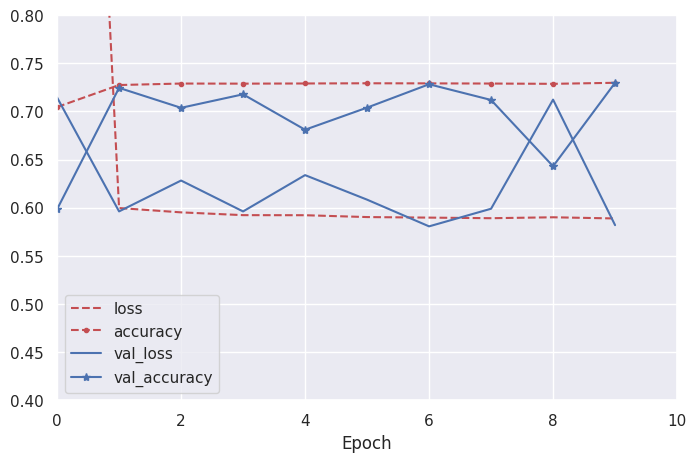

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 10], ylim=[0.4, 0.8], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [ ]:
model.evaluate(X_test_drinking, y_test_drinking)

6196/6196 [==============================] - 21s 3ms/step - loss: 0.5860 - accuracy: 0.7276


[0.5860016942024231, 0.7276409268379211]

We can see that with a more complicated Neural Network the accuracy didn't improve.